<a href="https://colab.research.google.com/github/yuvaravii/Email-Classification/blob/main/Email_campaign_effectiveness_ML_classification_problem_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.

Since what we are handling...is an classification algorithm.

We have majorly four type of classification problem that we face on daily challenges:
Different type of  Predictive model involves:
1. Binary classification
2. Multiclass classification
3. Multi label classification
4. Imbalanced classification.


**Binary classification**
Here the output of classification is only 2 types either normal (0) or abnormal(1) .

Eg. Mail classification - spam or not spam, conversion classification - churned or not , sales yes or no, employment yes or no.

Since our data set is Multiclass classification to predict whether the mail is read or ignored or acknoweleged



The most general algorithm used for Multiclass classifications are:
1. K Nearest Neighbour
2. Logistic Regression
3. Support vector machines
4. Decision tree, XGB ,RandomForest
5. Naive Bayes classifier

which we will be imputing in this project and observe how they perform.  However the Logistic regression and SVM are particularly built for Binary classifications


reference blog: https://www.analyticsvidhya.com/blog/2021/09/a-complete-guide-to-understand-classification-in-machine-learning/

In [ ]:
# Importing the necessary libraries for execution of Project

# Basic libraries
import pandas as pd
import numpy as np

#Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#setting the visualisation chart sizes
#sns.set(rc={'figure.figsize':(5,5)})

# ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error,mean_squared_error

# math libraries
from math import sqrt

# function for operating with operating system
import os

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

import warnings
warnings.filterwarnings('ignore')

In [ ]:
filepath='/content/drive/MyDrive/Colab Notebooks/Capstone Project/ML- Regression type/ML -Classification/Copy of data_email_campaign.csv'
raw_df=pd.read_csv(filepath)
df=raw_df.copy()

In [ ]:
df.loc[df['Email_Status']==0,].agg({'Word_Count':'mean','Total_Past_Communications':'mean','Total_Images':'mean','Subject_Hotness_Score':'mean'})

Word_Count                   725.256785
Total_Past_Communications     27.400129
Total_Images                   3.617575
Subject_Hotness_Score          1.159558
dtype: float64

In [ ]:
df.loc[df['Email_Status']==1,].agg({'Word_Count':'mean','Total_Past_Communications':'mean','Total_Images':'mean','Subject_Hotness_Score':'mean'})

Word_Count                   590.939578
Total_Past_Communications     34.707822
Total_Images                   3.187361
Subject_Hotness_Score          0.907519
dtype: float64

In [ ]:
df.loc[df['Email_Status']==2,].agg({'Word_Count':'mean','Total_Past_Communications':'mean','Total_Images':'mean','Subject_Hotness_Score':'mean'})

Word_Count                   620.615255
Total_Past_Communications     37.596797
Total_Images                   3.690415
Subject_Hotness_Score          0.486304
dtype: float64

**ASSUMPTIONS MADE IN DATASET**

EMAIL STATUS 


0 : Large in number thus a very common phenomenon (Business and promotional offers in mail are ignored) - Thus mails ignored are 0

1: Refers to odd or abnormal data in the data set, so we assume that it is being read.

2: it is totaly uncommon and rare phenonmenon - we assume that the mail is converted or acknowledged.

As the best quality of email conversion stated in
https://www.inc.com/jayson-demers/7-qualities-of-a-good-email.html

The word count should precise and concise , the follow ups should be stronger based on the data and intuition we assume that

In [ ]:
df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


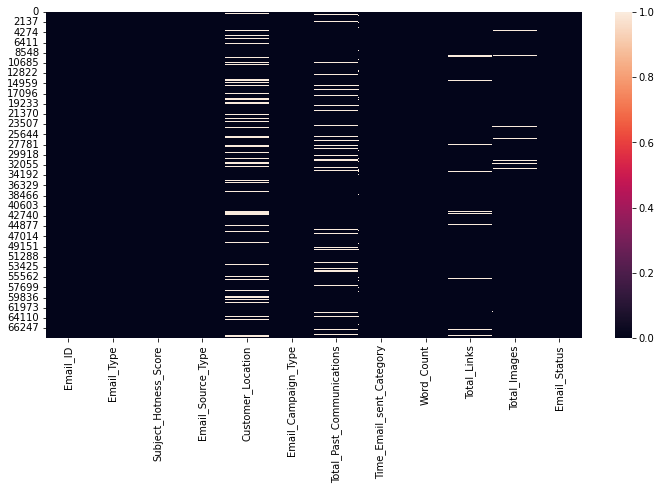

In [ ]:
# missing variable detection
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

**Treatment of missing values in Categorical variable:**

1. KNN imputer
2. replacing with 0
3. Replacing with mean,median,mode

This shall be done feature engineering

KNN - K Nearest Neighbour 

As the algorithm states , this imputer grabs the n values(hyperparameter) near to it and makes the average of it to impute the value.

Hyperparameters

1. Missing values - this does not only impute missing values of Nan but also int,str,float.
2. n_neighbors- input as integer, number of samples neighbour to be selected
3. weights: 2 types i)'uniform' ii) 'distance'
uniform - equal weightage , distance - weightage given in decremental way (nearer more weightage, farther weightage decrease)

In [ ]:
num_col=[col for col in df.columns if df[col].dtypes!='O']
cat_col=[col for col in df.columns if df[col].dtypes=='O']
target_variable=['Email_Status']

In [ ]:
# Imputing the values using KNN imputer

# Since distance based algorithm we should perform normalising thus
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()

#importing library 
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)

df['Total_Past_Communications'] = imputer.fit_transform(df[['Total_Past_Communications']])
df['Total_Links'] = imputer.fit_transform(df[['Total_Links']])
df['Total_Images'] = imputer.fit_transform(df[['Total_Images']])

In [ ]:
# for treatment of missing value in categorical variable 

# We shall use simple imputer
from sklearn.impute import SimpleImputer

simp_imputer=SimpleImputer(missing_values=np.nan, strategy="most_frequent")

df['Customer_Location'] = simp_imputer.fit_transform(df[['Customer_Location']])

In [ ]:
# to know unique values
for i in df.columns:
  print('The unique values present in {} is {}'.format(i,len(df[i].unique())))

The unique values present in Email_ID is 68353
The unique values present in Email_Type is 2
The unique values present in Subject_Hotness_Score is 51
The unique values present in Email_Source_Type is 2
The unique values present in Customer_Location is 7
The unique values present in Email_Campaign_Type is 3
The unique values present in Total_Past_Communications is 65
The unique values present in Time_Email_sent_Category is 3
The unique values present in Word_Count is 151
The unique values present in Total_Links is 38
The unique values present in Total_Images is 46
The unique values present in Email_Status is 3


In [ ]:
df.describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,11.894171,0.631103,271.719440,6.279655,5.527896,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
10%,1.000000,0.100000,1.000000,2.000000,14.000000,1.000000,352.000000,4.000000,0.000000,0.000000
20%,1.000000,0.200000,1.000000,2.000000,19.000000,2.000000,470.000000,6.000000,0.000000,0.000000
30%,1.000000,0.300000,1.000000,2.000000,22.000000,2.000000,560.000000,6.000000,0.000000,0.000000
40%,1.000000,0.500000,1.000000,2.000000,26.000000,2.000000,631.000000,8.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.933250,2.000000,694.000000,9.000000,0.000000,0.000000
60%,1.000000,1.200000,2.000000,2.000000,30.000000,2.000000,751.000000,11.000000,2.000000,0.000000


In [ ]:
df.shape # the number of columns are 12.

(68353, 12)

### Treatment of outliers

In [ ]:
# for convinience convert columns into categorical variable as they can be looped easily
num_col=[col for col in df.columns if df[col].dtypes!='O']
cat_col=[col for col in df.columns if df[col].dtypes=='O']

#creating df using the num and cat col
num_df=df[num_col]
cat_df=df[cat_col]

In [ ]:
def subset_by_iqr(df, column, whisker_width=1.5):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter] 

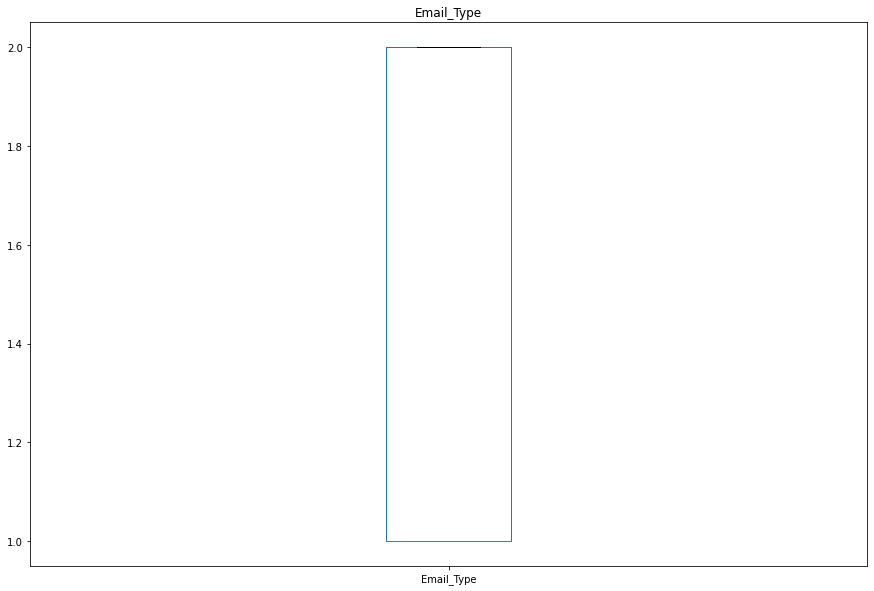

<Figure size 864x432 with 0 Axes>

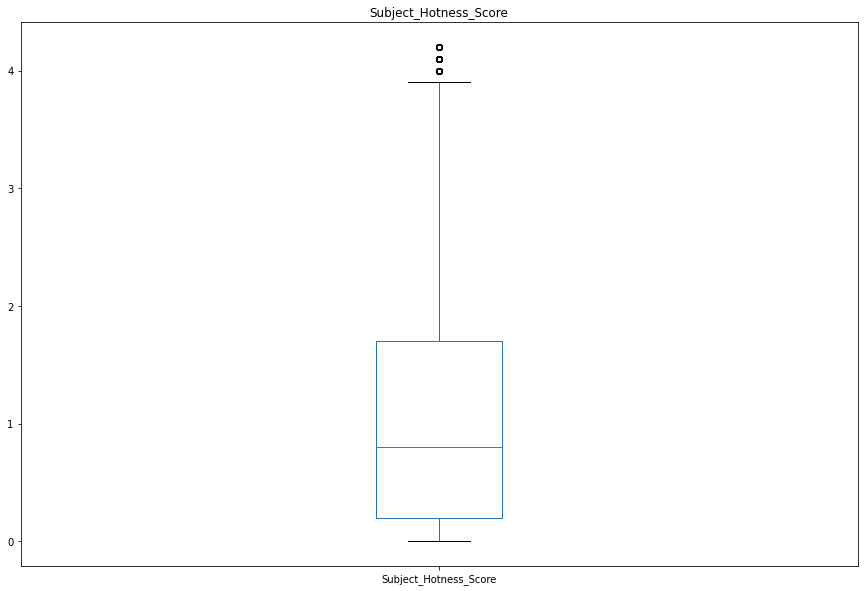

<Figure size 864x432 with 0 Axes>

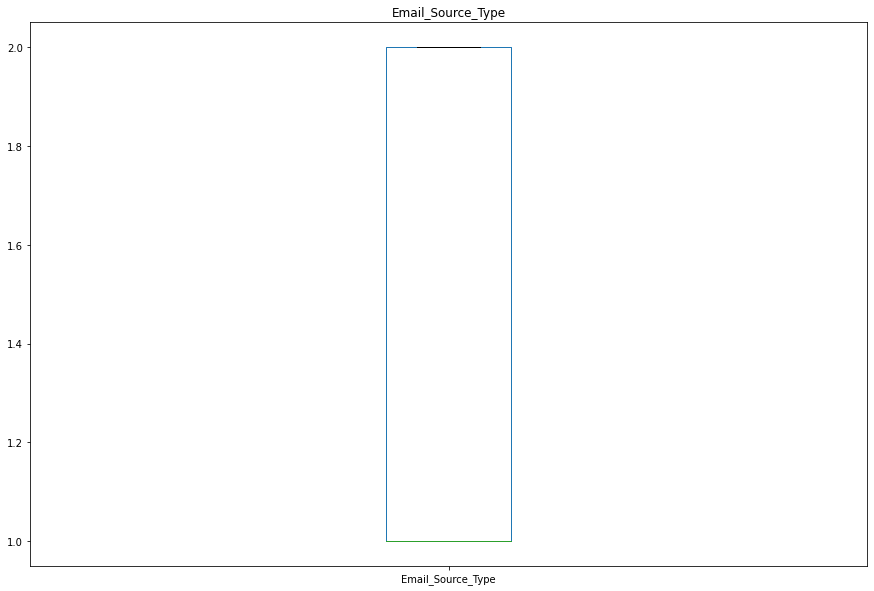

<Figure size 864x432 with 0 Axes>

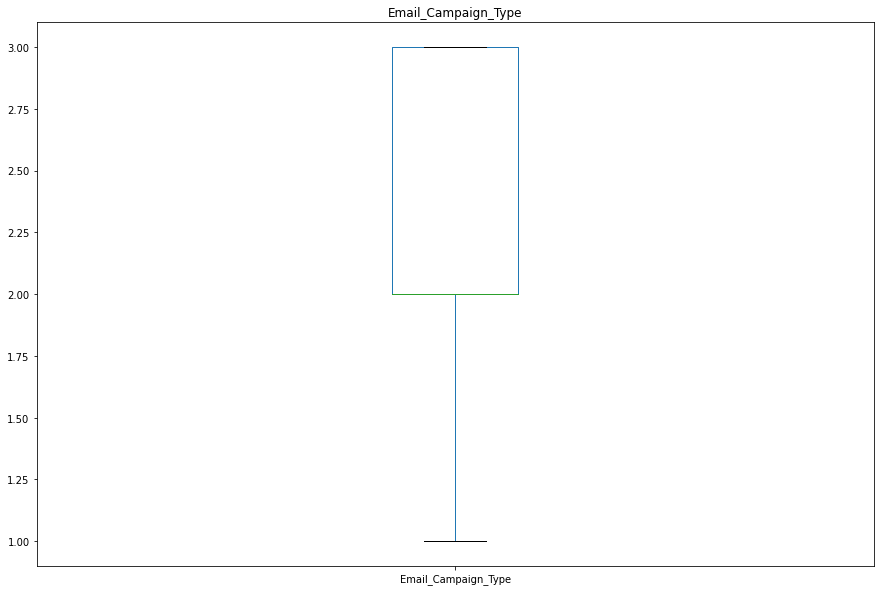

<Figure size 864x432 with 0 Axes>

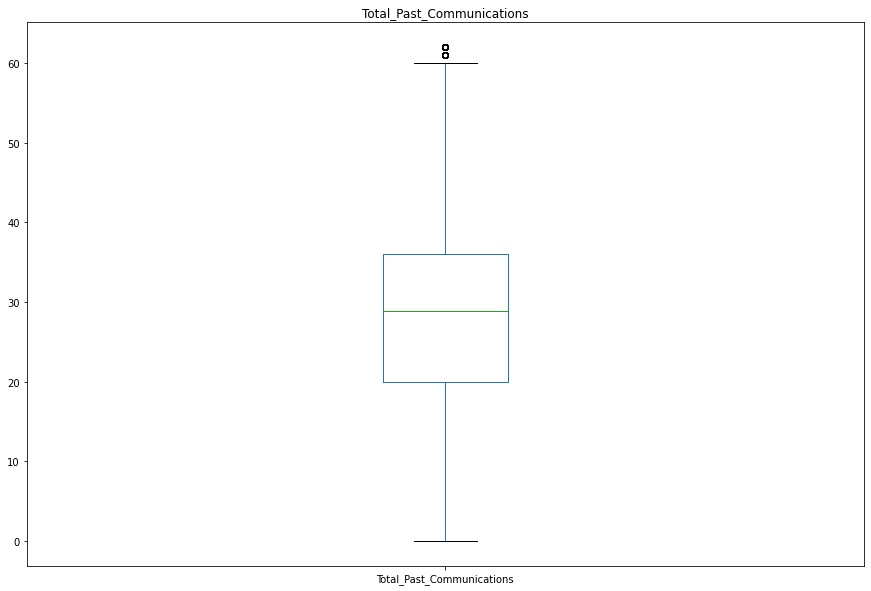

<Figure size 864x432 with 0 Axes>

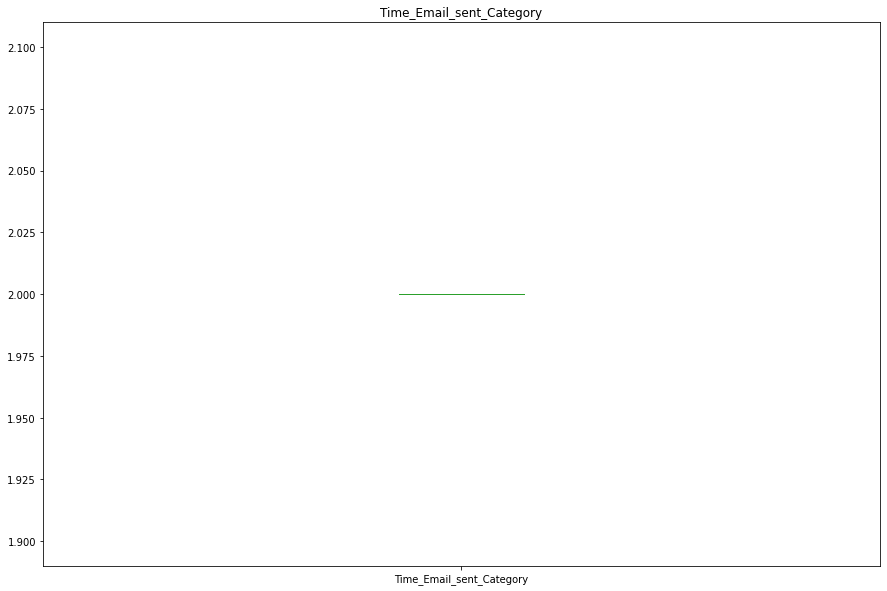

<Figure size 864x432 with 0 Axes>

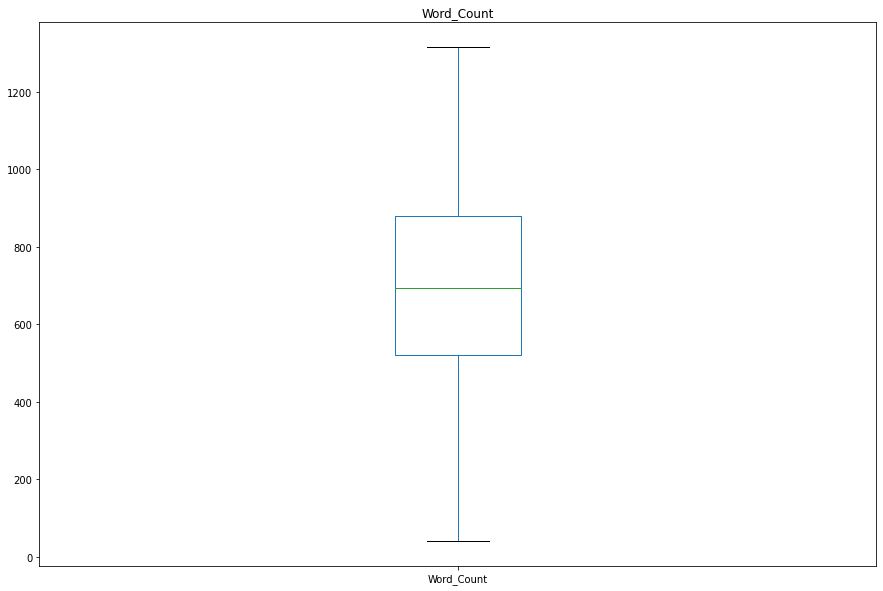

<Figure size 864x432 with 0 Axes>

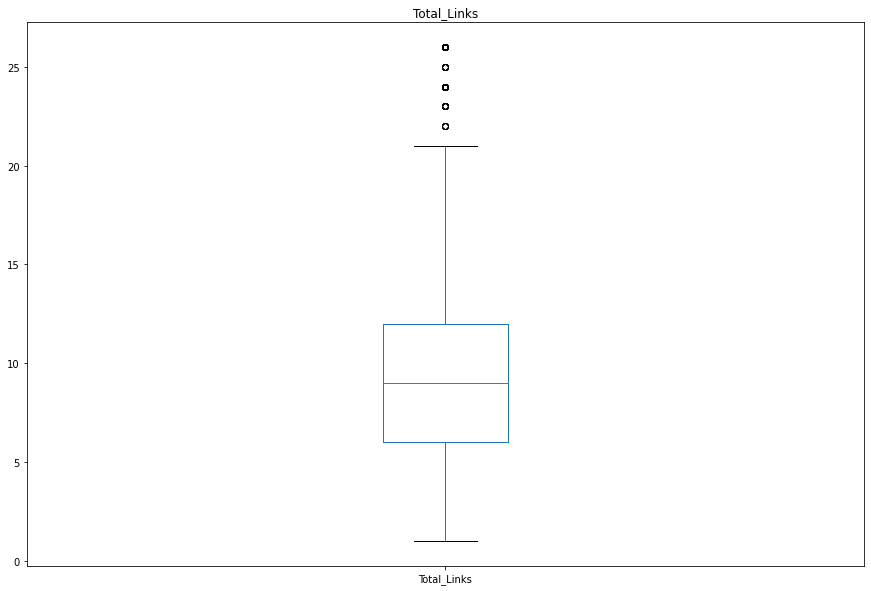

<Figure size 864x432 with 0 Axes>

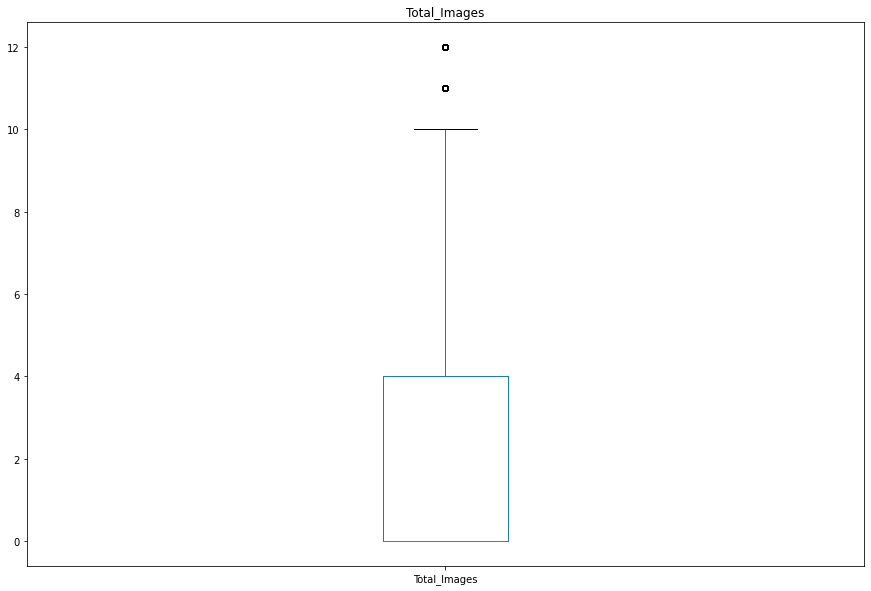

<Figure size 864x432 with 0 Axes>

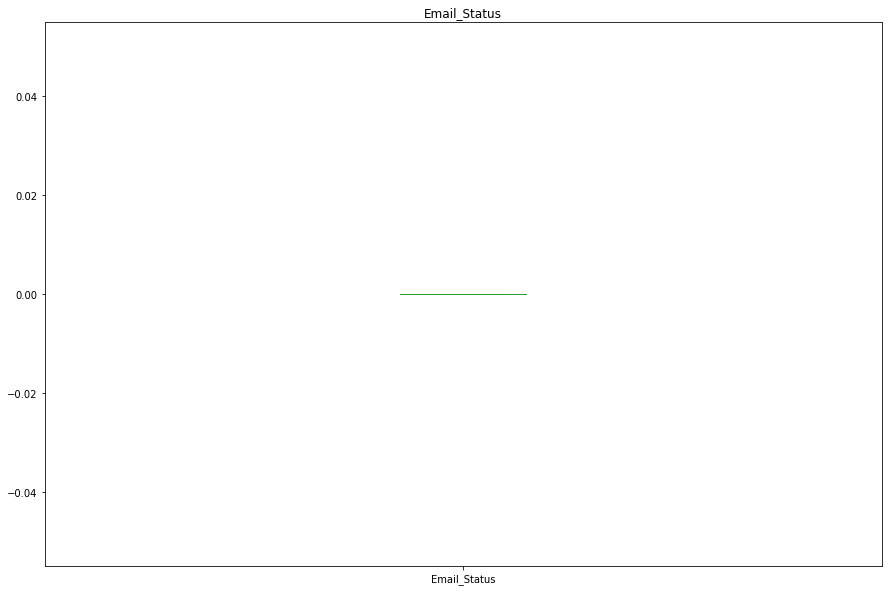

<Figure size 864x432 with 0 Axes>

In [ ]:
for col in num_col:
  subset_by_iqr(num_df,col)[col].plot.box()
  plt.title(str(col))
  plt.figure(figsize=(12,6))
  plt.show()

From the particular plot we could observe there may be some outliers in the  given columns

1. Subject_Hotness_Score
2. Total_links
3. Total_images


## Univariate Analysis

In [ ]:
df.columns #our target variable 'Email_Status' , better we plot with hue of Email_Status to gain maximum information

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

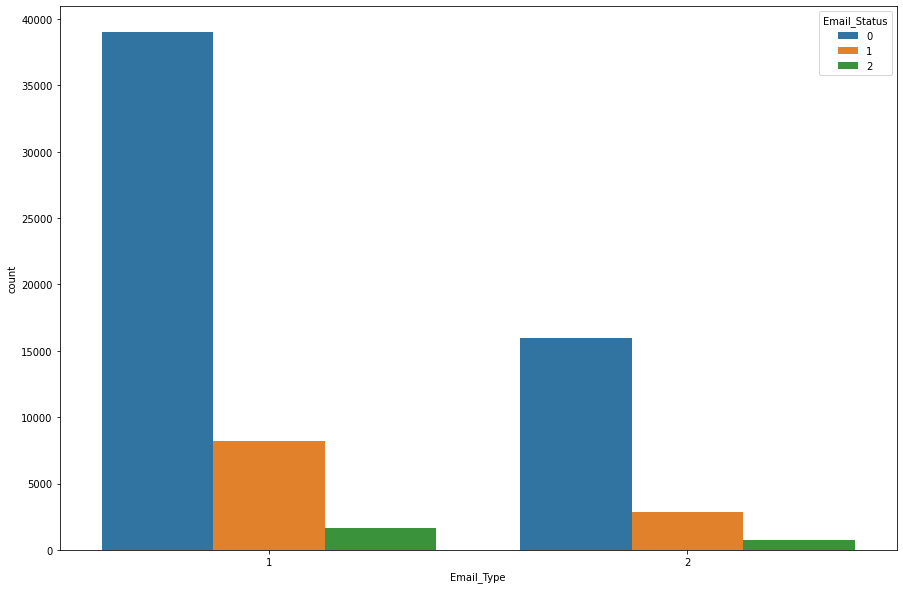

<Figure size 1080x720 with 0 Axes>

In [ ]:
# plotting for the EMAIL TYPE

sns.countplot(x='Email_Type',data=df,hue='Email_Status')
plt.figure()
plt.show()

Clearly there is no data present for email status 2 which means the imbalance in data is insignificant

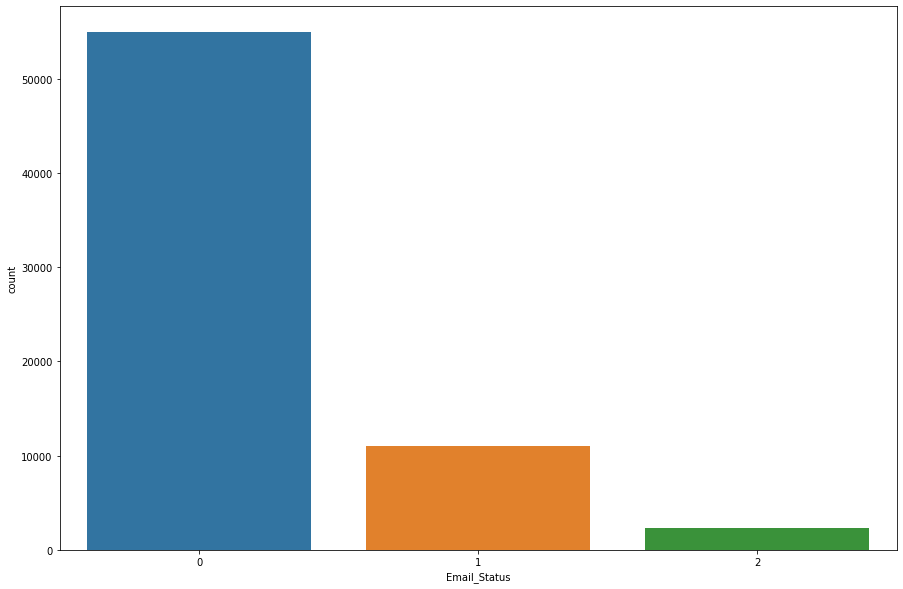

In [ ]:
sns.countplot(x='Email_Status',data=df)

Very imbalance data set for the prediction of outcomes. This could lead to biased result.

**Decision tree and logistic regression are inefficient against the imbalanced dataset as decision tree splits based on information gains so that minority data is quickly pushed to leaf node. In logistic regression the weightage given to the minority class is low. So both are inefficient to the imbalanced dataset**

Why so important ??

In some cases like fraudulent detection in credit card or banking sector will be less than 2% of the whole dataset. We cannot just omit it like an outlier as our prime target is to detect the fraudulent sector. So, we have to balance the datasome how to give a meaning ful analysis.

There are two methods to overcome this imbalanced dataset 1. reducing the frequency or data of majority class by removing. 2. Increasing the data set of minority class by duplication.


In first case (Reducing majority class) : the disadvantage is that important meaning ful data is also removed along with that.Advantage of that is reduced data thus resulting in increased speed and flexibility.

In second case (Increasing the minority class): randomly selecting the minority class values and duplicating them. *Adv* No information loss. Increase the no. of  values of minority class.
*Disadv* Since they data are replicated they cause overfitting of the model.


This could be overcome using oversampling and undersampling

 **Data level Approach**
1. Random Undersampling
2. Random Over-Sampling
3. Cluster-Based Over Sampling
4. Informed Over Sampling: Synthetic Minority Over-sampling Technique for imbalanced data-- new samples are generated similar to minor class they are not replicated 
5. Modified synthetic minority oversampling technique (MSMOTE) for imbalanced data


**Algorithmic Ensemble Techniques**
1. Bagging Based techniques for imbalanced data
2. Boosting-Based techniques for imbalanced data
3. Adaptive Boosting- Ada Boost techniques for imbalanced data
4. Gradient Tree Boosting techniques for imbalanced data
5. XG Boost techniques for imbalanced data

**NOTE : The smote technique shall be only applied to only training dataset as they are going to be used against testing data. Imputation of SMOTE in testing data set could cause a bias**

reference : https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

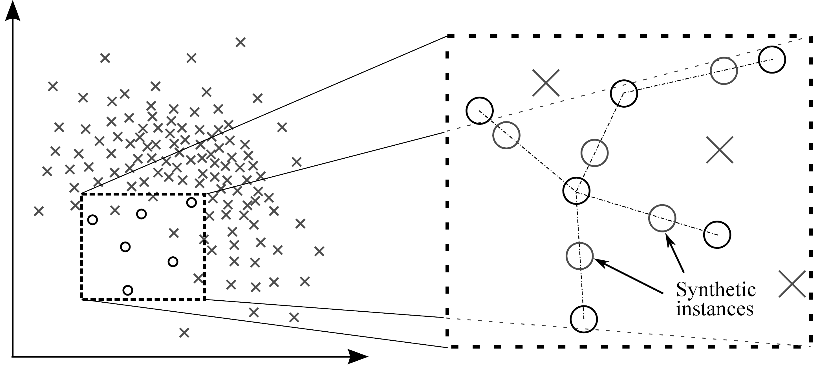

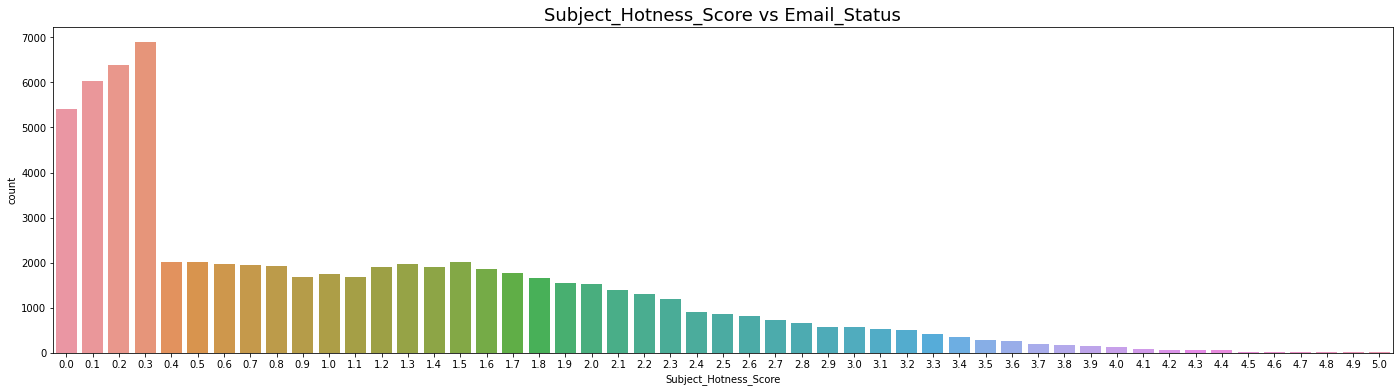

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(24,6))
sns.countplot(x='Subject_Hotness_Score',data=df)
plt.title('Subject_Hotness_Score vs Email_Status',fontsize=18)
plt.figure()
plt.show()

Here we could observe that the most of the data has subject hotness score less than 0.4

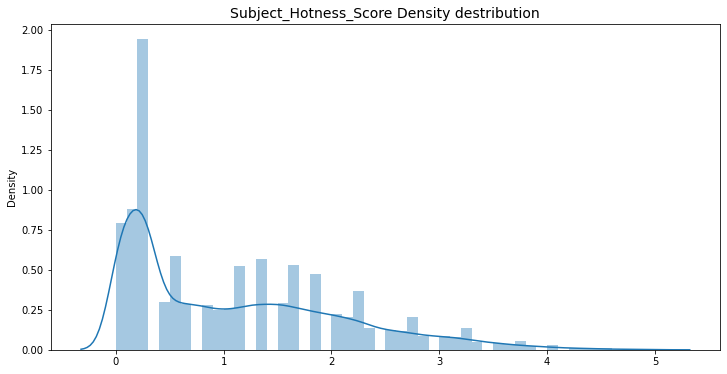

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['Subject_Hotness_Score'], hist=True)
plt.title('Subject_Hotness_Score Density destribution',fontsize=14)
plt.show()


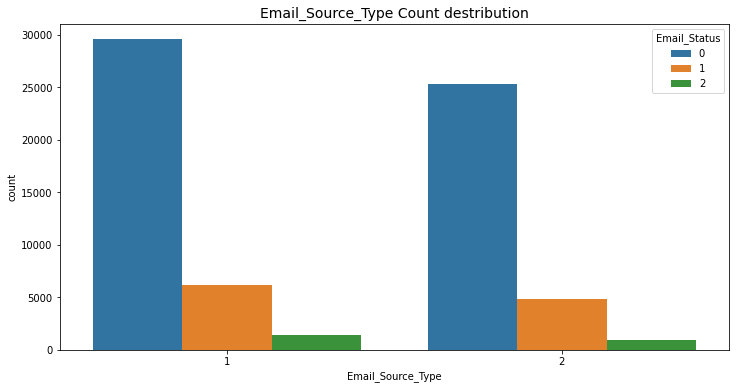

In [ ]:
df['Email_Source_Type']
plt.figure(figsize=(12,6))
sns.countplot(x=df['Email_Source_Type'],data=df,hue='Email_Status')
plt.title('Email_Source_Type Count destribution',fontsize=14)
plt.show()

Email source type 1 has more aknowlegment count that email source type 2 also the type 1 has been ignored more too.

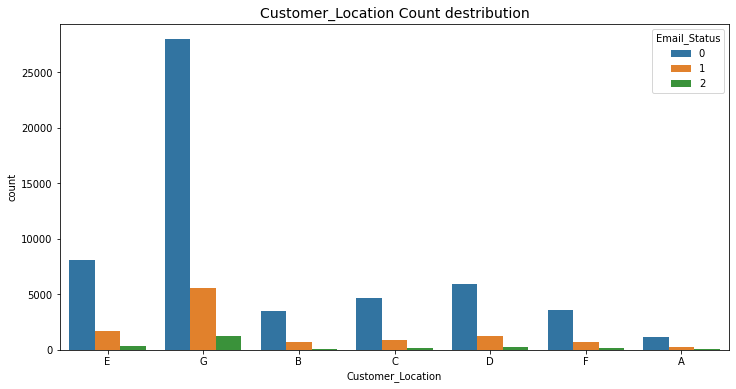

Observation:Here the customers from location G has ignored more no. of mails also they are being acknowleged more too.
 The Location C falls in the second rank. Location A has least of ignored, read,Acknowleged


In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Customer_Location'],data=df,hue='Email_Status')
plt.title('Customer_Location Count destribution',fontsize=14)
plt.show()
print('Observation:Here the customers from location G has ignored more no. of mails also they are being acknowleged more too.\n The Location C falls in the second rank. Location A has least of ignored, read,Acknowleged')

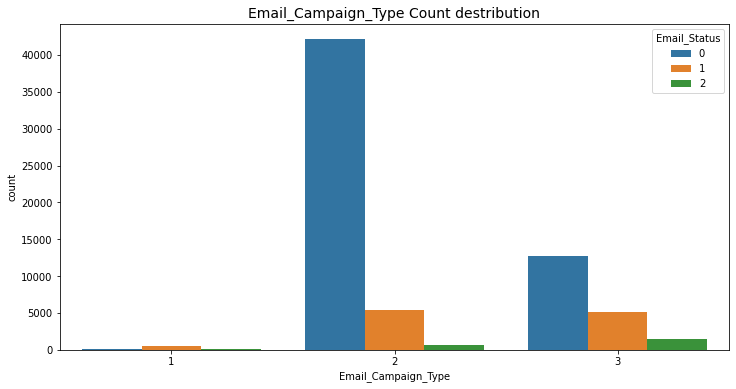

Observations: the Email campaign 3 is found more effective as the count is low and conversion rate is high,
 Also the type2 email campaign is not very effective as their mails are ignored more.


In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Email_Campaign_Type'],data=df,hue='Email_Status')
plt.title('Email_Campaign_Type Count destribution',fontsize=14)
plt.show()
print('Observations: the Email campaign 3 is found more effective as the count is low and conversion rate is high,\n Also the type2 email campaign is not very effective as their mails are ignored more.')

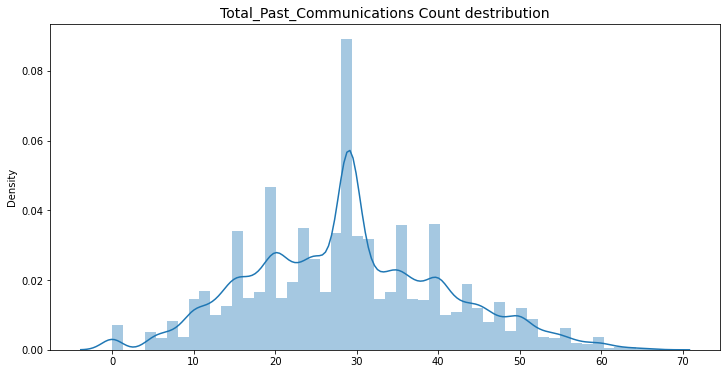

Here the values are normally distributed


In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['Total_Past_Communications'],hist=True)
plt.title('Total_Past_Communications Count destribution',fontsize=14)
plt.show()
print('Here the values are normally distributed')

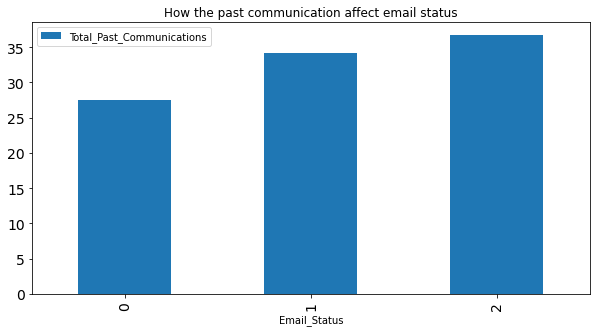

<Figure size 1080x720 with 0 Axes>

Observation : the mail which has communicated multiple times in past have been converted into leads and acknowledgment


In [ ]:
df.groupby('Email_Status').agg({'Total_Past_Communications':'mean'}).plot(kind='bar',title='How the past communication affect email status',figsize=(10,5),fontsize=14)
plt.figure()
plt.show()
print('Observation : the mail which has communicated multiple times in past have been converted into leads and acknowledgment')

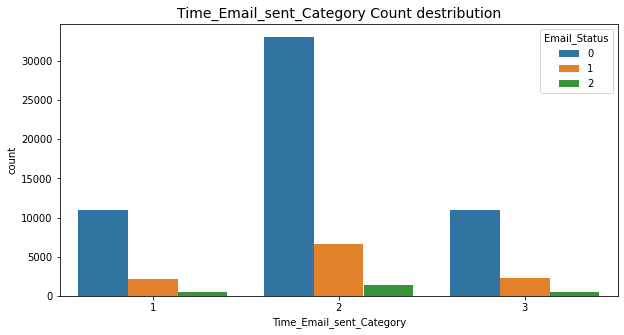

Observation: The email ignored,read and acknowleged is high during the afternoon session.
 As they are logical, people tend to give attention to the mail in afternoon more than morning and night


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Time_Email_sent_Category'],data=df,hue='Email_Status')
plt.title('Time_Email_sent_Category Count destribution',fontsize=14)
plt.show()
print('Observation: The email ignored,read and acknowleged is high during the afternoon session.\n As they are logical, people tend to give attention to the mail in afternoon more than morning and night')

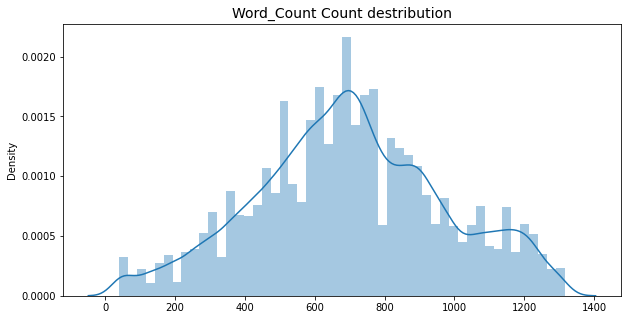

The plot are normally distributed


In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(x=df['Word_Count'])
plt.title('Word_Count Count destribution',fontsize=14)
plt.show()
print('The plot are normally distributed')

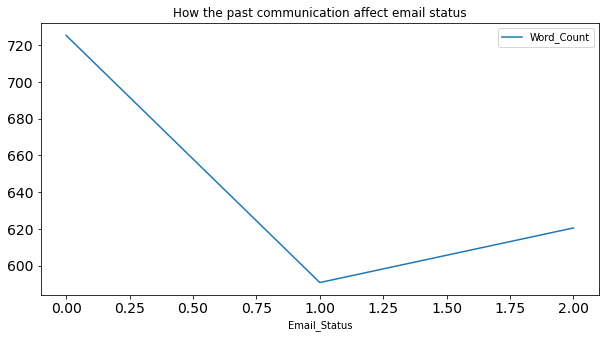

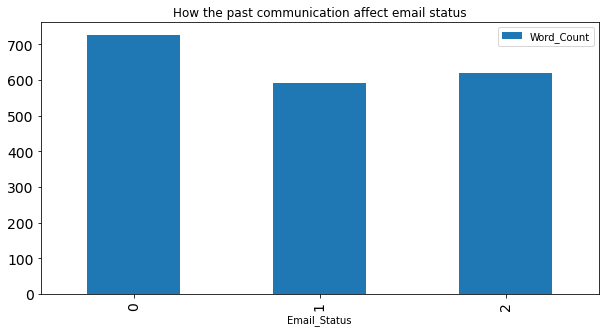

Observation : we can see that number of words are higher in ignored mails and lower numbers are read whereas the moderate numbers are converted


In [ ]:
df.groupby('Email_Status').agg({'Word_Count':'mean'}).plot(kind='line',title='How the past communication affect email status',figsize=(10,5),fontsize=14)
df.groupby('Email_Status').agg({'Word_Count':'mean'}).plot(kind='bar',title='How the past communication affect email status',figsize=(10,5),fontsize=14)
plt.show()
print('Observation : we can see that number of words are higher in ignored mails and lower numbers are read whereas the moderate numbers are converted')

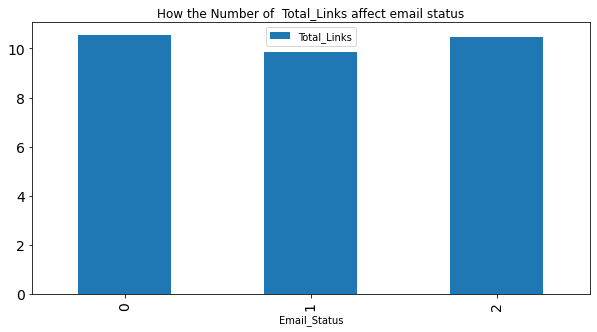

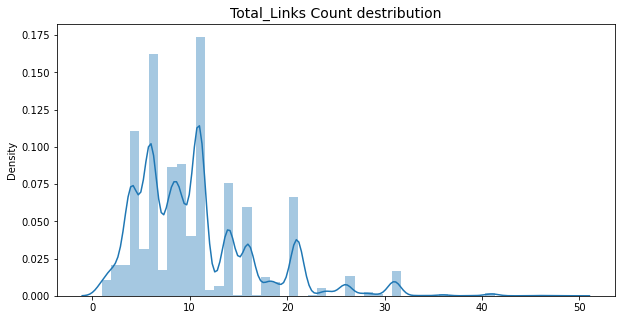

The distribution of total links are not normal they are right skewed in nature


In [ ]:
df.groupby('Email_Status').agg({'Total_Links':'mean'}).plot(kind='bar',title='How the Number of  Total_Links affect email status',figsize=(10,5),fontsize=14)

plt.figure(figsize=(10,5))
sns.distplot(x=df['Total_Links'],hist=True)
plt.title('Total_Links Count destribution',fontsize=14)
plt.show()

print('The distribution of total links are not normal they are right skewed in nature')

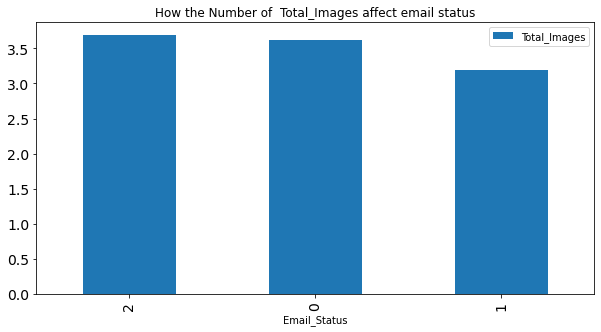

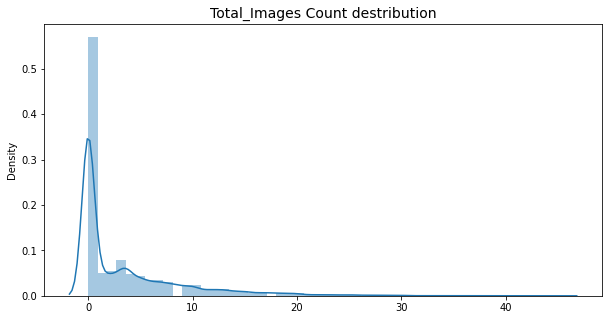

The total Images are rightly skewed and the converted lead mails have low number of images


In [ ]:
df.groupby('Email_Status').agg({'Total_Images':'mean'}).sort_values(by='Total_Images',ascending=False).plot(kind='bar',title='How the Number of  Total_Images affect email status',figsize=(10,5),fontsize=14)

plt.figure(figsize=(10,5))
sns.distplot(x=df['Total_Images'],hist=True)
plt.title('Total_Images Count destribution',fontsize=14)
plt.show()

print('The total Images are rightly skewed and the converted lead mails have low number of images')


## Bi Variate Analysis

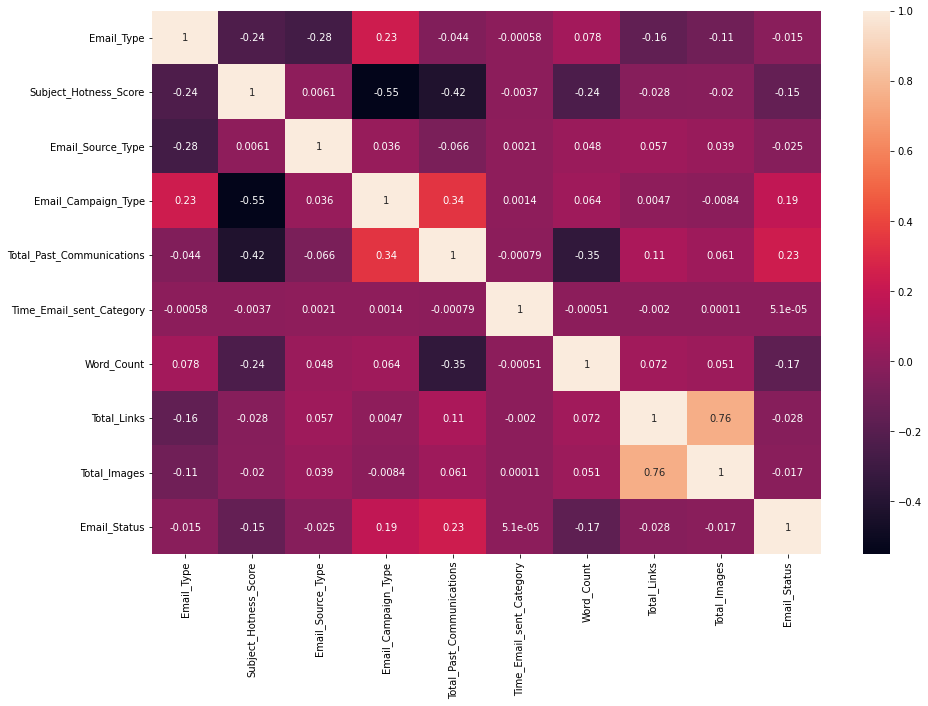

<Figure size 1080x720 with 0 Axes>

In [ ]:
corr_df=df.corr()
sns.heatmap(corr_df,annot=True)
plt.figure()
plt.show()


Though there no strong correlation with target variable.
The strongly corelated variables are 
1. Total links and total images
2. Subject_hotness_score and email_campaign_type



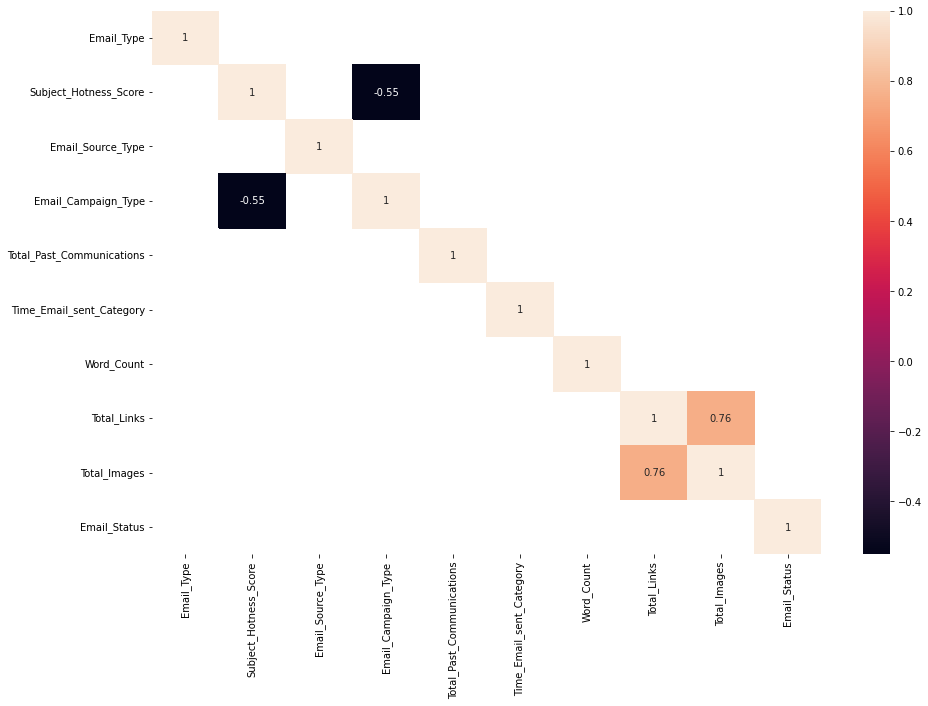

In [ ]:
sns.heatmap(corr_df[(corr_df<(-0.5)) | (corr_df>0.5)],annot=True)

print('''
Though there no strong correlation with target variable.
The strongly corelated variables are 
1. Total links and total images
2. Subject_hotness_score and email_campaign_type
''')

In [ ]:
num_col

['Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [ ]:
# checking multicollinearity between the features using vif

#importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[num_col]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]


In [ ]:
vif_data

,feature,VIF
0,Email_Type,9.586604
1,Subject_Hotness_Score,2.323808
2,Email_Source_Type,9.299626
3,Email_Campaign_Type,29.384922
4,Total_Past_Communications,9.368461
5,Time_Email_sent_Category,10.059892
6,Word_Count,8.548776
7,Total_Links,8.987169
8,Total_Images,3.304348
9,Email_Status,1.332892


In [ ]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

The multicollinearity is a major issue in logistic regression. However in other alogrithms they are not the major issue.

## Feature Engineering

In [ ]:
df.describe({0.15,0.30,0.45,0.60,.75,0.9,.95,0.99})

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,11.894171,0.631103,271.719440,6.279655,5.527896,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
15%,1.000000,0.100000,1.000000,2.000000,16.000000,1.000000,419.000000,4.000000,0.000000,0.000000
30%,1.000000,0.300000,1.000000,2.000000,22.000000,2.000000,560.000000,6.000000,0.000000,0.000000
45%,1.000000,0.700000,1.000000,2.000000,28.000000,2.000000,662.000000,9.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.933250,2.000000,694.000000,9.000000,0.000000,0.000000
60%,1.000000,1.200000,2.000000,2.000000,30.000000,2.000000,751.000000,11.000000,2.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,37.000000,2.000000,880.000000,14.000000,5.000000,0.000000


after transformation of subject hotness score


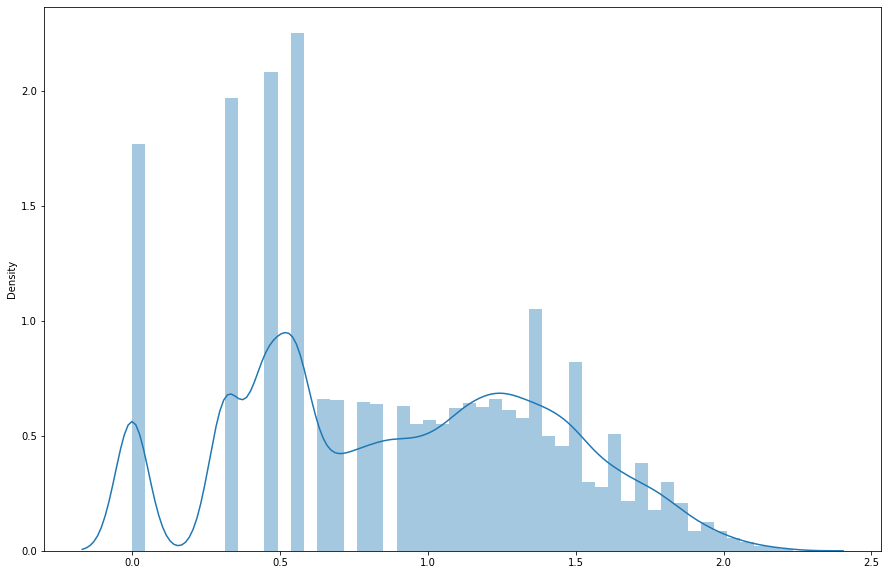

In [ ]:
# To remove the skewness present in the continous variables like Subject_Hotness_Score,Total_Links

# We perform square root transformation to convert them into normal distribution

sns.distplot(x=np.sqrt(df['Subject_Hotness_Score']), hist=True)

df['Subject_Hotness_Score']=np.sqrt(df['Subject_Hotness_Score'])

print('after transformation of subject hotness score')

**before transformation:**

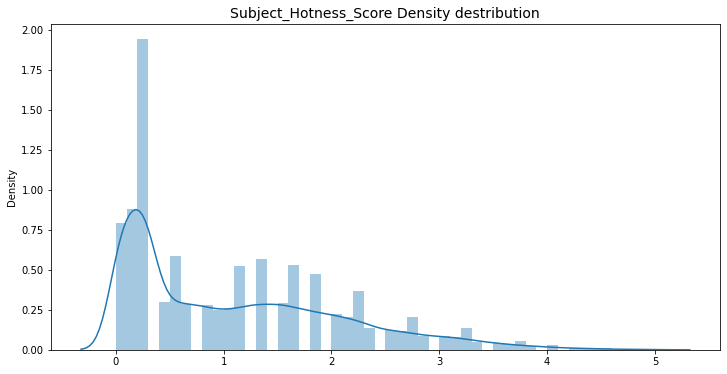

after transformation of Total_Links


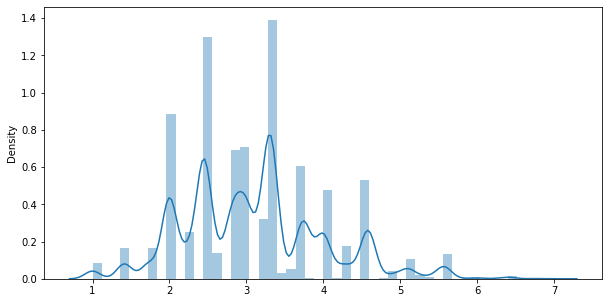

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(x=np.sqrt(df['Total_Links']), hist=True)

df['Total_Links']=np.sqrt(df['Total_Links'])

print('after transformation of Total_Links')


**Before transformation**

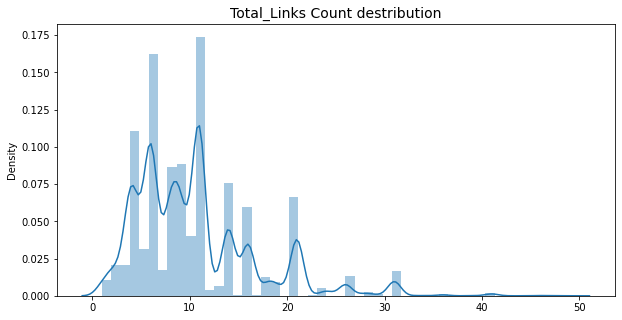

In short, the process to generate the synthetic samples are as follows.

Choose random data from the minority class.
Calculate the Euclidean distance between the random data and its k nearest neighbors.
Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
Repeat the procedure until the desired proportion of minority class is met.

[Reference link](https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc)

In [ ]:
# Getting dummies for the location
df=pd.get_dummies(df,columns=['Customer_Location'])

## Algorithm Imputation

In [ ]:
# train, test split

#importing library
from sklearn.model_selection import train_test_split

X=df[df.columns.drop(['Email_Status','Email_ID'])].values
y=df['Email_Status'].values

print('The shape of X is {}'.format(X.shape))
print('The shape of y is {}'.format(y.shape))
print('__'*100)
print('__'*100)

# Usage of SMOTE (synthetic minority oversampling technique)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)
print('The shape of X_smote is {}'.format(X_smote.shape))
print('The shape of y_smote is {}'.format(y_smote.shape))
print('__'*100)
print('__'*100)



X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,train_size=0.6,test_size=0.4,shuffle=True,random_state=42) # as we are going to impute SMOTE in the variable its better to have larger test data set
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

print('__'*100)
print('__'*100)

y_resample=pd.DataFrame(y_smote)
y_resample.value_counts()# now the equal distribution is achieved using the SMOTE method


The shape of X is (68353, 16)
The shape of y is (68353,)
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The shape of X_smote is (164823, 16)
The shape of y_smote is (164823,)
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The shape of X_train is (98893, 16)
The shape of X_test is (65930, 1

2    54941
1    54941
0    54941
dtype: int64

## Logistic Regression

An linear Classification algorithm.
1. Supervised machine learning algorithm
2. Since they are used in linear separable the outcome shall be either or. So binary output (yes/no)
3. Sigmoid function squeze the values of probability into value of 0 and 
4. In logistic regression, as the output is a probability value between 0 or 1, mean squared error wouldn’t be the right choice. So, instead, we use the cross-entropy loss function.
5. Here an assumption of linear relationship between the Dependant and independant variable is prevailing.

The cross-entropy loss function is used to measure the performance of a classification model whose output is a probability value.

**Types**
1. Simple logistic regression
2. Multiple logistic regression


**Pros**
1. Uses linear algorithm as base model
2. Simpler in nature and easy to execute


**Cons**
1. Cannot handle real time problem due to complexity
2. Prone to multicollinearity
3. Mostly they underfit the real time data
4. Cannot perform other than binary output like multiclass or multilabel or imbalanced datasets (To over come this we shall use i) multinomial logistic regression ii)Ordered Logistic Regression )
5. They are vulnerable to outliers
6. The predicted value even goes beyond 0 and 1 (means more than 100 %)

**Applications**
1. Classifying daily productivity
2. NLP
3. Categorising the likelyhood of disease development of particular individual

**Hyperparameters**


reference link:https://www.analyticsvidhya.com/blog/2021/07/an-introduction-to-logistic-regression/

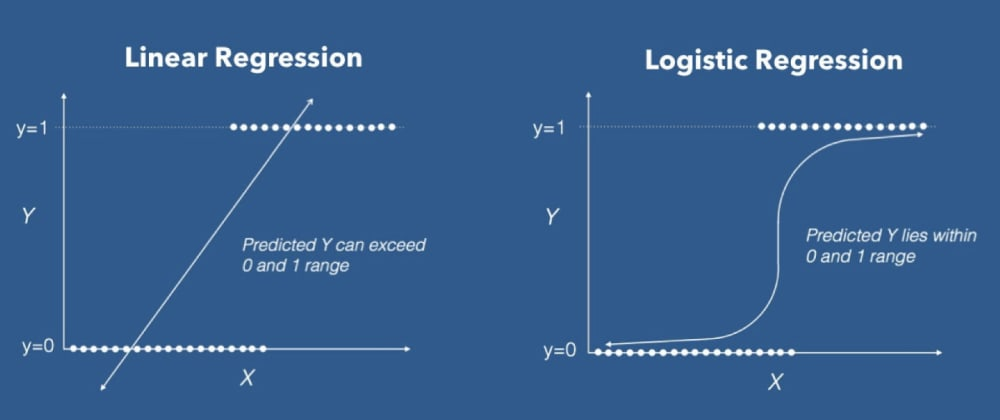

In [ ]:
# Since its a linear regression we have to follow
# 1. Remove multicollinearity variables
# 2. MinMaxScaling


# Step1
lin_reg_list=df.columns.drop(['Time_Email_sent_Category','Email_Campaign_Type','Email_ID'])
lin_reg_df=df[lin_reg_list]
lin_reg_df.head(3)

#Step2 train test split
X_log_reg=df[lin_reg_df.columns.drop(['Email_Status'])].values
y_log_reg=df['Email_Status'].values.reshape(-1,1)

#step 3 MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_log_reg)
X_scaled = scaler.transform(X_log_reg)

print('The shape of X is {}'.format(X.shape))
print('The shape of y is {}'.format(y.shape))
print('__'*100)
print('__'*100)

# Usage of SMOTE (synthetic minority oversampling technique)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_scaled,y)
print('The shape of X_smote is {}'.format(X_smote.shape))
print('The shape of y_smote is {}'.format(y_smote.shape))
print('__'*100)
print('__'*100)



X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,train_size=0.6,test_size=0.4,shuffle=True,random_state=42,stratify=y_smote) # as we are going to impute SMOTE in the variable its better to have larger test data set
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

print('__'*100)
print('__'*100)


The shape of X is (68353, 16)
The shape of y is (68353,)
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The shape of X_smote is (164823, 14)
The shape of y_smote is (164823,)
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The shape of X_train is (98893, 14)
The shape of X_test is (65930, 1

In [ ]:
# imputing logistic regression

#importing the library
from sklearn.linear_model import LogisticRegression

#linear model
logistc_clf=LogisticRegression(C=0.01,fit_intercept=True,random_state=42,solver='saga',max_iter=150,n_jobs=-1) # since multiclass output we use saga
logistc_clf.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=150, n_jobs=-1, random_state=42,
                   solver='saga')

What is c and SAGA in clf above??

C is an hyperparameter where it gives the weightage for penalty term. Higher c means trust the train dataset a lot and penalty weightage is low. Lower c means reality is different so penalty weightage is high.
So, C decides the quantity of penalizations.


SAGA: 

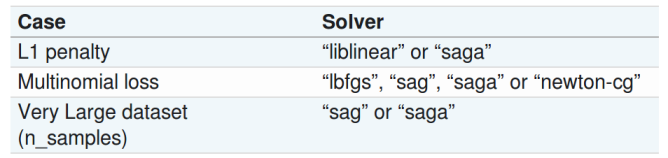

In [ ]:
# predicting the output
y_train_pred_log=logistc_clf.predict(X_train)
y_test_pred_log=logistc_clf.predict(X_test)

# probability of the output
y_train_proba=logistc_clf.predict_proba(X_train)
y_test_proba=logistc_clf.predict_proba(X_test)

In [ ]:
# computing the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred_log)
print("Accuracy of test data: {:.2f}%".format(accuracy * 100))
print('___'*100)

accuracy = accuracy_score(y_train, y_train_pred_log)
print("Accuracy of train data: {:.2f}%".format(accuracy * 100))

Accuracy of test data: 49.71%
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Accuracy of train data: 49.65%


In [ ]:
pd.DataFrame(logistc_clf.coef_,columns=(lin_reg_df.columns.drop(['Email_Status'])))

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,0.184126,1.685904,0.060487,-1.240392,1.408055,0.546196,-0.120925,-0.025777,0.069890,-0.006556,-0.004803,-0.027068,-0.011674,0.006028
1,-0.102201,0.154524,0.058523,0.404009,-0.869158,-0.483533,-0.101699,0.017574,0.071975,-0.071328,0.021734,-0.010282,-0.019201,-0.010499
2,-0.081925,-1.840428,-0.119010,0.836383,-0.538897,-0.062663,0.222624,0.008203,-0.141864,0.077884,-0.016931,0.037350,0.030875,0.004471


In [ ]:
lin_reg_df.columns.drop(['Email_Status'])

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Total_Past_Communications', 'Word_Count', 'Total_Links',
       'Total_Images', 'Customer_Location_A', 'Customer_Location_B',
       'Customer_Location_C', 'Customer_Location_D', 'Customer_Location_E',
       'Customer_Location_F', 'Customer_Location_G'],
      dtype='object')

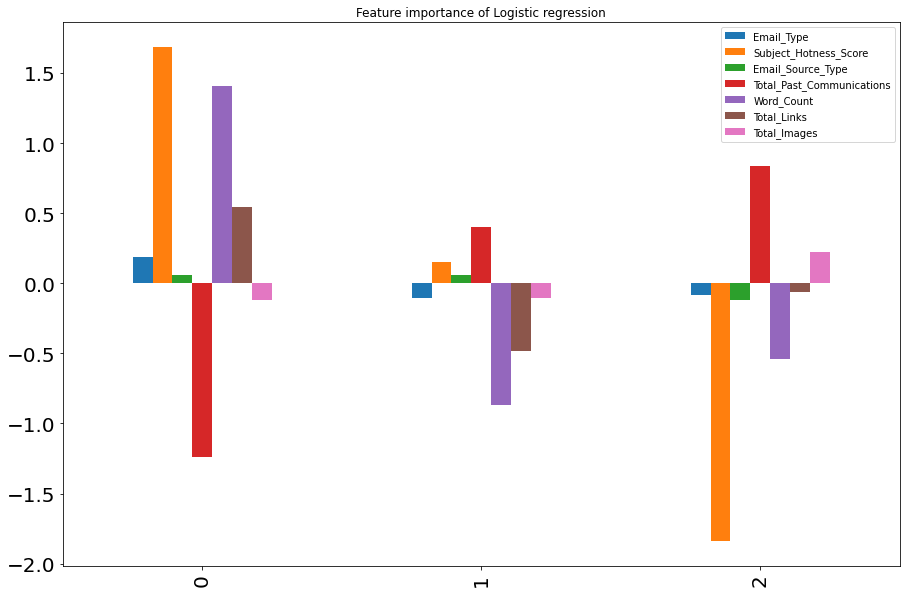

In [ ]:
log_feat_df=pd.DataFrame(logistc_clf.coef_,columns=(lin_reg_df.columns.drop(['Email_Status'])))
log_feat_df.drop(['Customer_Location_A', 'Customer_Location_B',
       'Customer_Location_C', 'Customer_Location_D', 'Customer_Location_E',
       'Customer_Location_F', 'Customer_Location_G'],axis=1).plot(kind='bar',title='Feature importance of Logistic regression',fontsize=20)

**Confusion Matrix:**

reference Link: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

1. A confusion matrix N X N, where the 'N' is the number of classifications present in target variable.
2. A binary classification has TP,TN,FP,FN.

  2.1. TP -True positive - predicted as true and actual is true.precise prediction. Healthy model

  2.2. TN- True Negative- predicted as negative and actual is negative. Precise prediction.Healthy model

  2.3 FP - False positive - wrongly predicted as positive. predicted as positive and actual is negative.

  2.4 FN - False Negative - Wrongly predicted as Negative. predicted as negative and actual is positive.

3. **Precision and Recall**

**Precision** - TP/(TP+FP) - see the denominator this is our model reliablity. Out of n prediction how many prediction were successful.
Precision is about past, how well the model has predicted the outcome.

**Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.**

Applications:

Precision is important in music or video recommendation systems, e-commerce websites, etc. Wrong results could lead to customer churn and be harmful to the business.

**Recall / Sensitivity / True Positive Rate**

- TP/(TP+FN)- here the basement is about reality(actuals). This say how well our model correctly predicted the outcome. Recall is based on reality. If recall score is very low then our model is rarely predicting the sick person. It is about future prediction

Applications:


Recall is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

**F1 Score:**
In some cases we could not clearly distinguish, whether the recall or precision or accuracy is better term to evaluate. Thus we combine them!! Harmonic mean of precision and recall

Cons : We dont know what the model is maximizing, is it recall or precision ? thus f1 score interpretability is low.

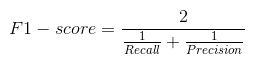


**False Negative Rate/ **
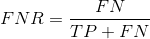

Here the reference is actual value (means at denominator).So it is complimentary of recall.

Higher Recall and lower True negative rate are highly preferrable


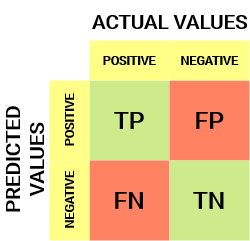

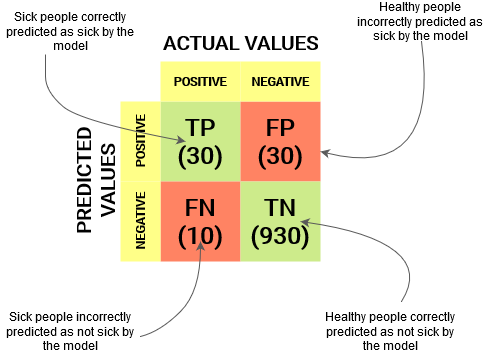

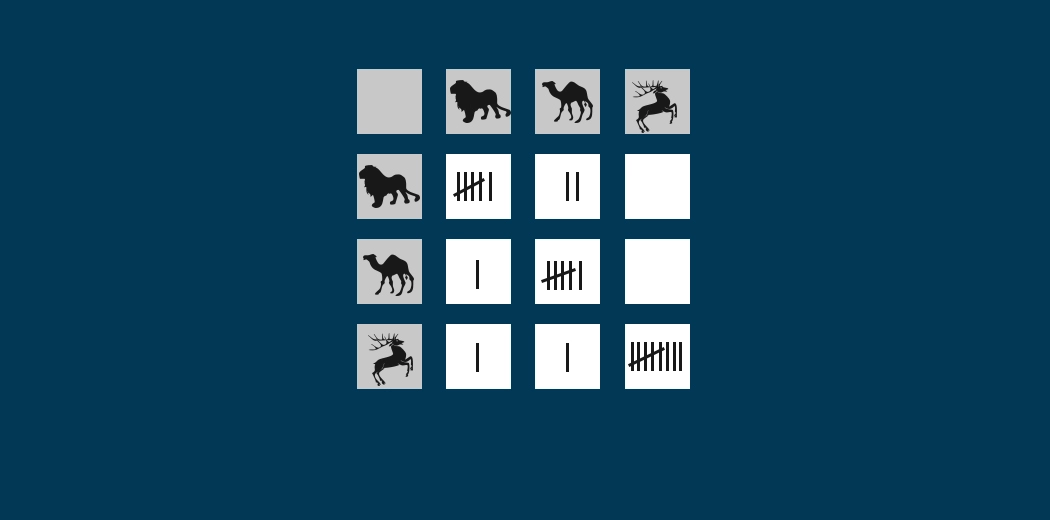

**For Multiclass problems:**
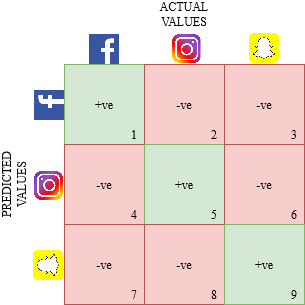  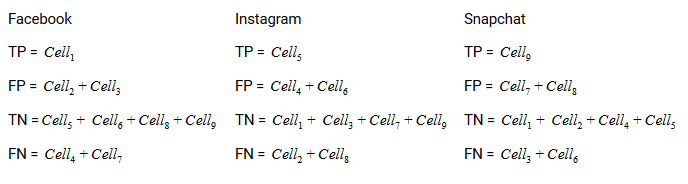

Text(0.5, 1.0, 'Confusion Matrix')

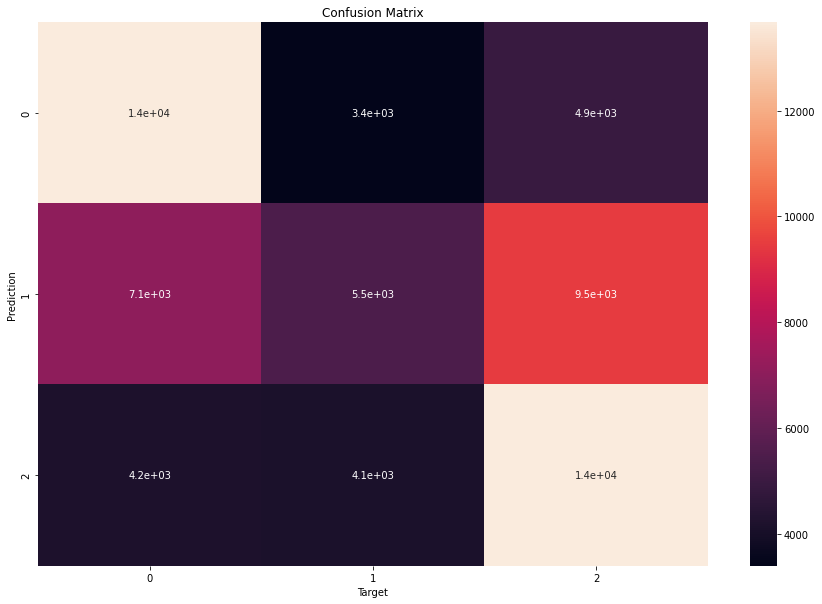

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_test_pred_log)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix')

In [ ]:
# For knowing the roc auc,roc curve ,precision ,recall curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve,precision_recall_curve,average_precision_score,auc

**AUC _ ROC score:**
[reference link](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)
1. fullform: Area under curve of receiver characterstic operator 
2. Helps in visualising how an model is performing
3. Majorly used for binary classification and then can be extended to multiclass classification problem.
4. The sensitivity and specificity are it core evaluation metric.
Specificity = TN/(TN+FP) or true negative rate (basement is reality)

During AUC ROC curve the area above 0.5 line has higher sensitivity and lower specificity.

This should be understood like this:

When x is increasing the specificity(True Negative rate) decreases.

When y is increasing the sensitivity (True positive rates) increases

piece of cake!!!

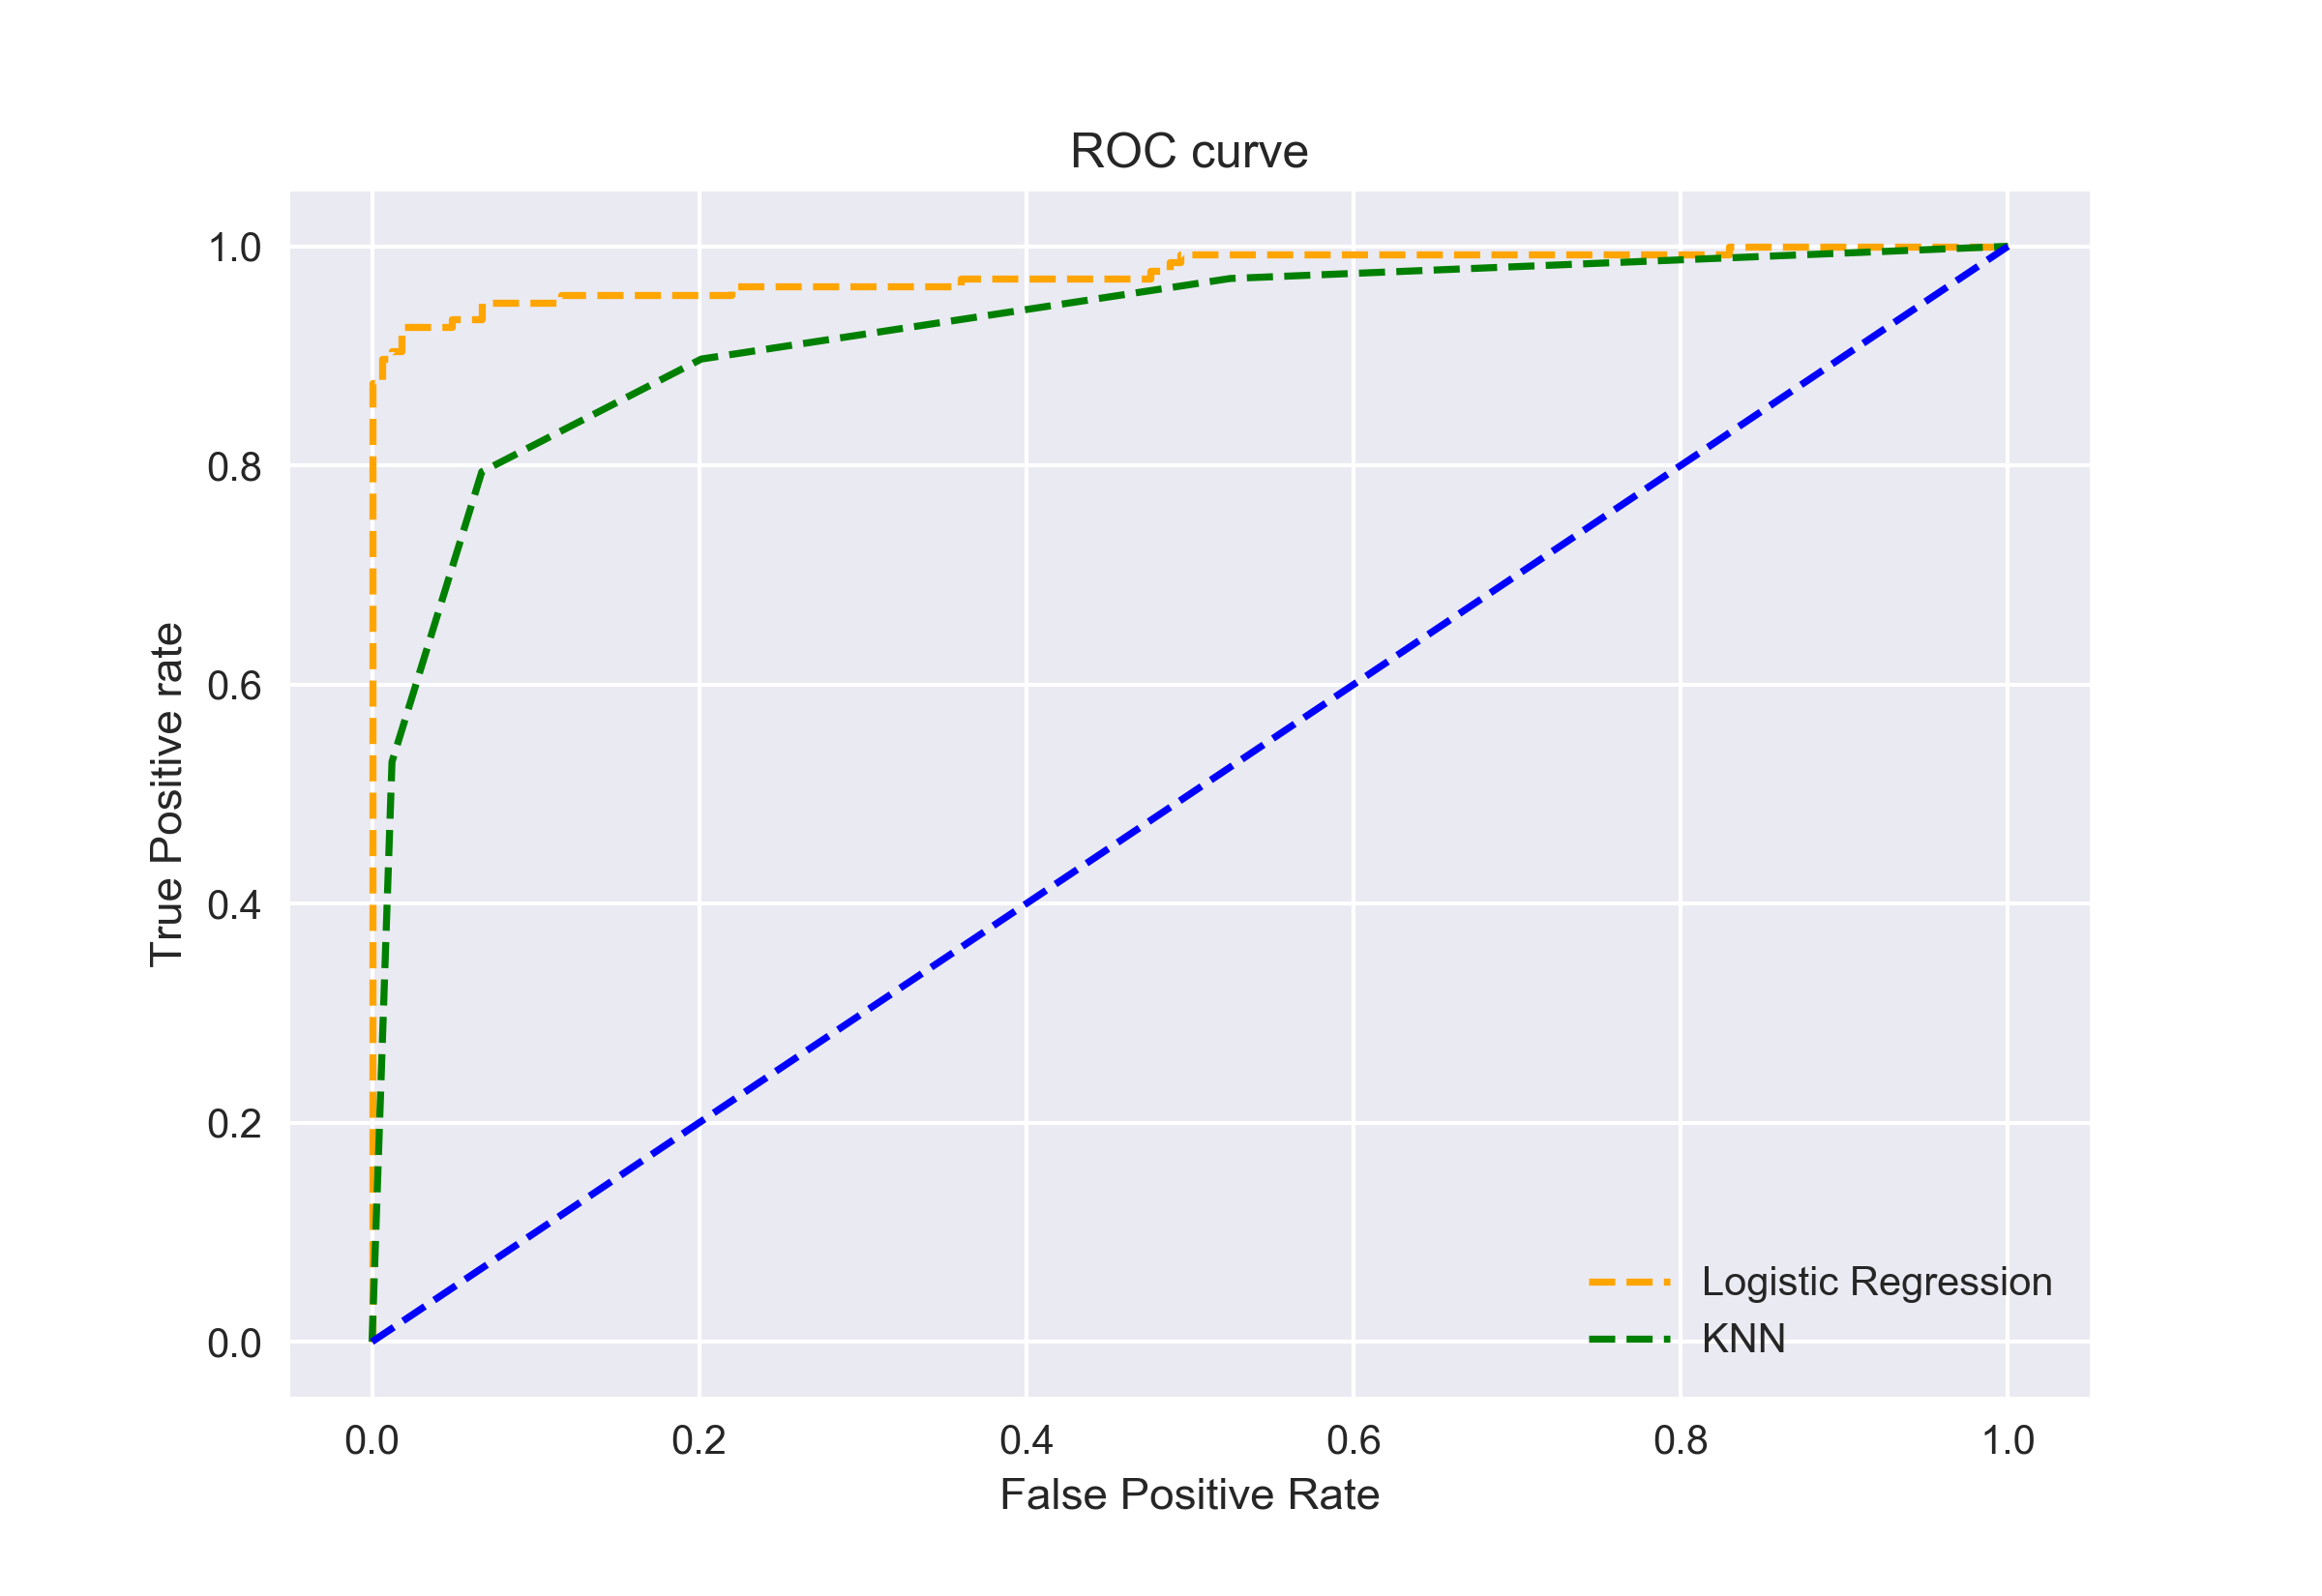


Best outcomes is higher sensitivity and higher specificity , in above diagram the Logistic regression has performed much better than KNN


How to evaluate AUC curve ??

Higher the AUC curve means the model is able to classify the true values accurately(AUC=1)


Lower the AUC means (AUC =0) then they are classifying the positives as negatives and vice versa (complete changes)




If AUC between 0.5<AUC<1 then with higher probability they are classifying the positive values from the negative class.

When AUC=0.5 they randomly select the positives and negatives rather than distinguishing.

the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.


**AUC = 1**

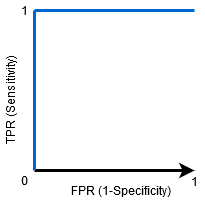


**0.5 < AUC < 1**


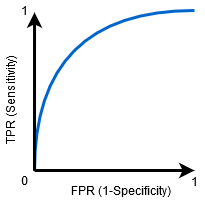


**AUC =0.5**


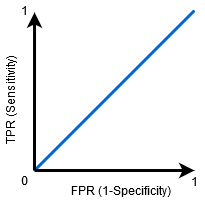



In [ ]:
# Imputing AUC -ROC score
roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')  #here we have to input the probability score, otherwise we could get error

0.6799281777795549

In [ ]:
#lets get the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_log))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58     21976
           1       0.42      0.25      0.31     21977
           2       0.49      0.62      0.55     21977

    accuracy                           0.50     65930
   macro avg       0.49      0.50      0.48     65930
weighted avg       0.49      0.50      0.48     65930



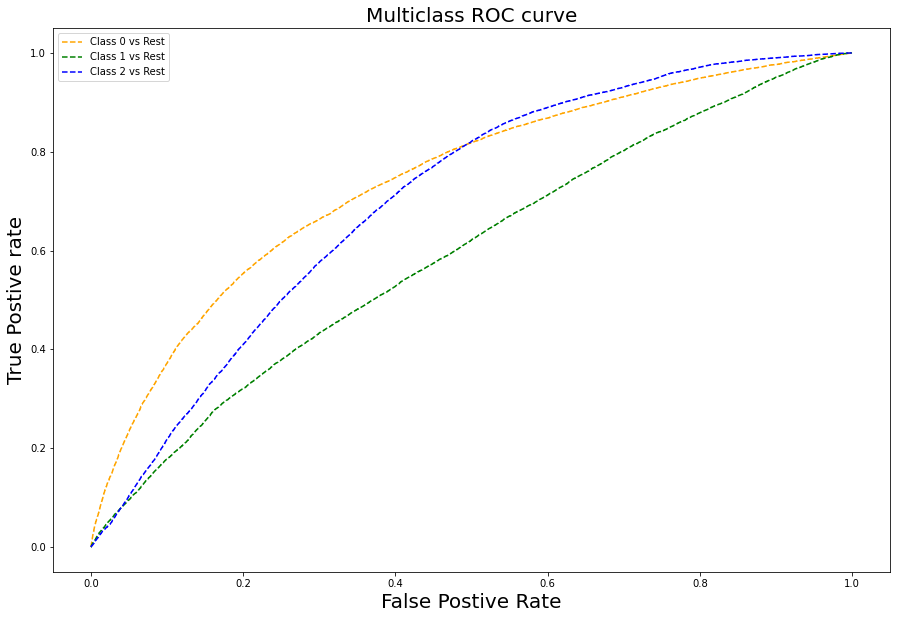

In [ ]:
# Lets plot roc_auc curve
#importing libraries
from sklearn.metrics import plot_roc_curve, auc

# 
# Compute ROC curve and ROC area for each class
y_score=y_test_proba
n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

## Grid search of logistic Regression

In [ ]:
#importing library
from sklearn.model_selection import GridSearchCV
logistc_clf=LogisticRegression(random_state=2021) # hyperparameter shall be tuned for betterment (C, max_iter,solver)
                   
# Dictionary of hyperparameter to search for the best features
param_dict ={
    'C':[0.001,0.01,0.1],
    'max_iter':[50,100,150],
    'penalty':['l2', 'elasticnet'],
    'solver':['newton-cg','sag','saga'],
    'class_weight':['balanced','weight'],
}

#PREPARING OUR GRID SEARCH
gs=GridSearchCV(
    estimator=logistc_clf,
    param_grid=param_dict,
    scoring=['roc_auc','precision','recall','accuracy'],  #sklearn.metrics.scorers.keys()
    refit='accuracy', #output with best roc_auc will be given as output
    cv=3,
)

# Training the model
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=2021),
             param_grid={'C': [0.001, 0.01, 0.1],
                         'class_weight': ['balanced', 'weight'],
                         'max_iter': [50, 100, 150],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga']},
             refit='accuracy',
             scoring=['roc_auc', 'precision', 'recall', 'accuracy'])

In [ ]:
gs.best_estimator_ # gets the best model among all iterations

LogisticRegression(C=0.001, class_weight='balanced', max_iter=50,
                   random_state=2021, solver='newton-cg')

In [ ]:
gs.best_params_ # gets the best parameters that caused the maximum score

{'C': 0.001,
 'class_weight': 'balanced',
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
lr_clf=LogisticRegression(C= 0.001,
 class_weight= 'balanced',
 max_iter= 50,
 penalty= 'l2',
 solver='newton-cg')

#fitting in the model
lr_clf=lr_clf.fit(X_train,y_train)

# predicting the output
y_train_pred_log=lr_clf.predict(X_train)
y_test_pred_log=lr_clf.predict(X_test)

# probability of the output
y_train_proba=lr_clf.predict_proba(X_train)
y_test_proba=lr_clf.predict_proba(X_test)

# computing the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred_log)
print("Accuracy of test data: {:.2f}%".format(accuracy * 100))
print('___'*100)

accuracy = accuracy_score(y_train, y_train_pred_log)
print("Accuracy of train data: {:.2f}%".format(accuracy * 100))
print('___'*100)

# Imputing AUC -ROC score
lr_auc=roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')
print('The AUC ROC score is {}'.format(lr_auc))

Accuracy of test data: 49.74%
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Accuracy of train data: 49.64%
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
The AUC ROC score is 0.679128514291512


No significant improvement even after fitting the Best parameters using grid search. So we can move to next model

## XGBoost classification


In [ ]:
# Getting the data ready for XGB

# train, test split

#importing library
from sklearn.model_selection import train_test_split

X=df[df.columns.drop(['Email_Status','Email_ID'])].values
y=df['Email_Status'].values.reshape(-1,1)

print('The shape of X is {}'.format(X.shape))
print('The shape of y is {}'.format(y.shape))
print('__'*100)
print('__'*100)

# Usage of SMOTE (synthetic minority oversampling technique)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)

print('The shape of X_smote is {}'.format(X_smote.shape))
print('The shape of y_smote is {}'.format(y_smote.shape))
print('__'*100)
print('__'*100)

#Since scaling is important in distance based algorithm lets minmax it..!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_log_reg)
X_scaled = scaler.fit_transform(X_smote)
y_scaled=scaler.fit_transform(y_smote.reshape(-1,1))

#label encoding of y
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_labeled=le.fit_transform(y_scaled)


X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_labeled,train_size=0.6,test_size=0.4,shuffle=True,random_state=42) # as we are going to impute SMOTE in the variable its better to have larger test data set
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

print('__'*100)
print('__'*100)

y_resample=pd.DataFrame(y_smote)

The shape of X is (68353, 16)
The shape of y is (68353, 1)
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The shape of X_smote is (164823, 16)
The shape of y_smote is (164823,)
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The shape of X_train is (98893, 16)
The shape of X_test is (65930,

The xgb is an boosting type of ensemble of decision tree. The hyperparameter are classified into 4 types:
1. General parameter
2. Booster parameter
3. Learning task parameters
4. Command line parameters

**General parameters** - includes what type of classification either linear or tree model
1. booster - gblinear , gbtree
2. verbosity

**Booster parameter**-
1. eta or learning_rate- range(0,1) : at every stage of boosting they use previous feature weightage, this eta tries to shrink the values for efficient boosting and conservation. This lets model to learn on weak learners.
2. gamma or min_split_loss- range(0 to infinity) : Minimum loss(entropy or gini) required to split the leaf node of a tree.
3. max_depth - it is the growth of tree. the more it grows it overfits and the end result doesnot apply for generalised conditions.
4. lambda : l2 regularisation weightage. more lambda more weightage thus tree becomes more conservative. 


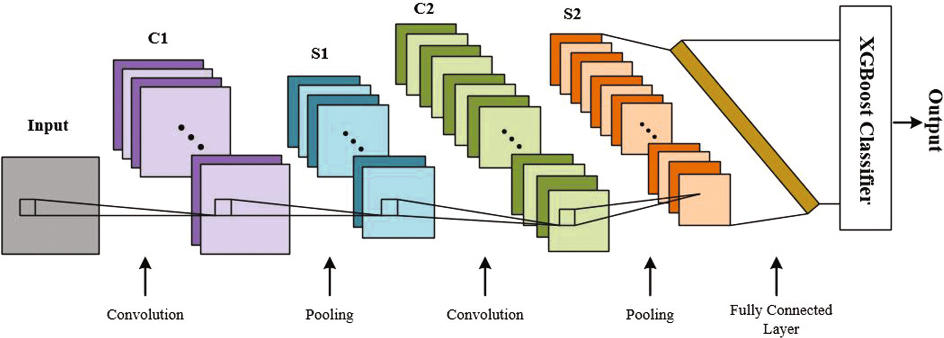

In [ ]:
# imputing the XGB
from xgboost import XGBClassifier

xgb=XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=100, num_classes=3)

#fitting the model
xgb.fit(X_train,y_train)

XGBClassifier(max_depth=5, num_classes=3, objective='multi:softprob')

In [ ]:
# predicted classes
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

In [ ]:
# predicted classes
y_train_proba = xgb.predict_proba(X_train)
y_test_proba = xgb.predict_proba(X_test)

In [ ]:
#AUC score for train dataset
auc_roc=roc_auc_score(y_train, y_train_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Train dataset is {}'.format(auc_roc))

#AUC score for train dataset
auc_roc=roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Test dataset is {}'.format(auc_roc))

The AUC ROC score of Train dataset is 0.8949147576552177
The AUC ROC score of Test dataset is 0.8865484807228825


In [ ]:
#lets get the classification report of Train data
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_log))

              precision    recall  f1-score   support

           0       0.34      0.39      0.36     33015
           1       0.33      0.18      0.23     33009
           2       0.33      0.43      0.38     32869

    accuracy                           0.33     98893
   macro avg       0.33      0.33      0.32     98893
weighted avg       0.33      0.33      0.32     98893



In [ ]:
#lets get the classification report of Test data
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_log))

              precision    recall  f1-score   support

           0       0.33      0.39      0.36     21926
           1       0.33      0.18      0.23     21932
           2       0.34      0.43      0.38     22072

    accuracy                           0.33     65930
   macro avg       0.33      0.33      0.32     65930
weighted avg       0.33      0.33      0.32     65930



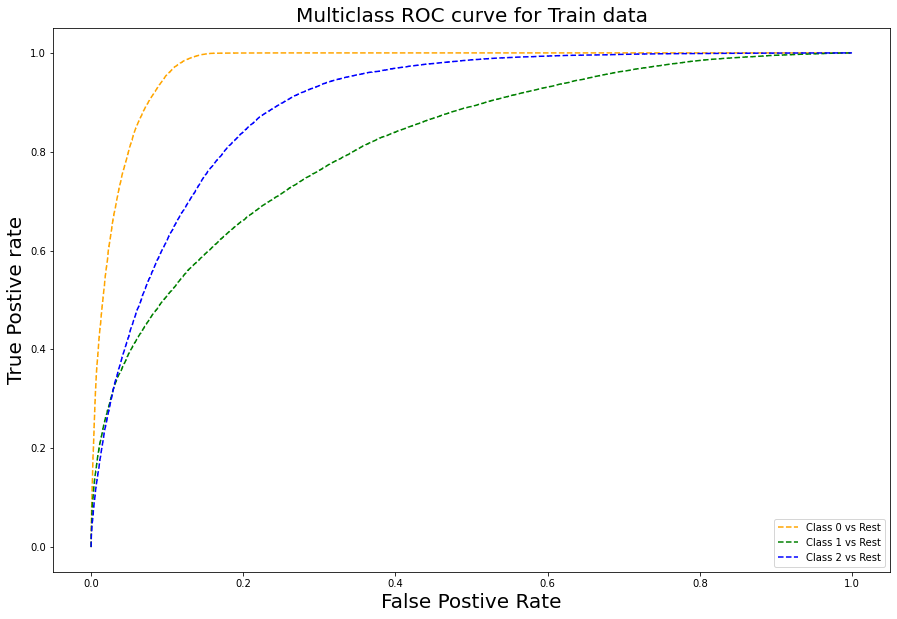

In [ ]:
# Lets plot roc_auc curve for train data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc
 
# Compute ROC curve and ROC area for each class

n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train, y_train_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Train data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

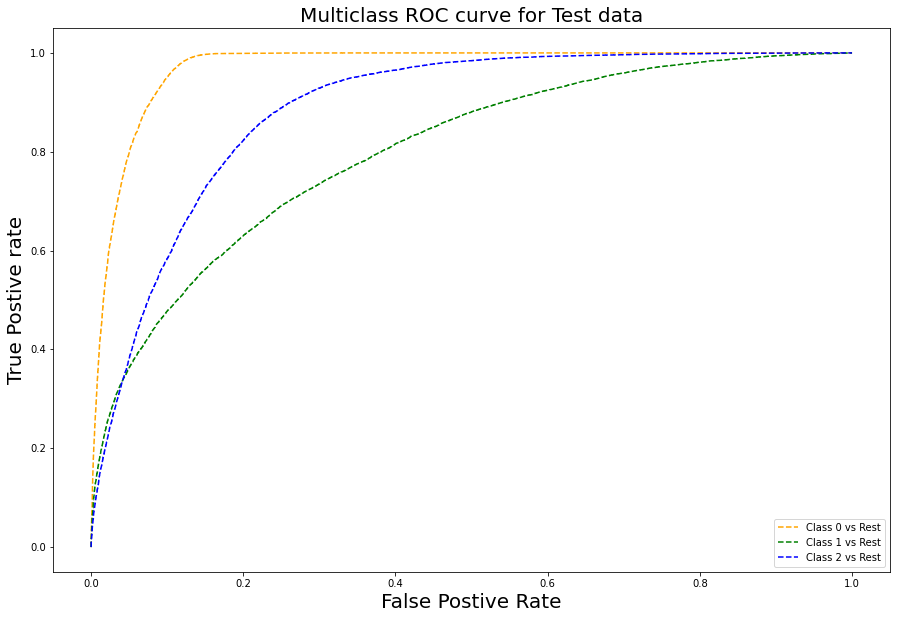

In [ ]:
# Lets plot roc_auc curve for train data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc
 
# Compute ROC curve and ROC area for each class

n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Test data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

## Grid search XGB

In [ ]:
from sklearn.model_selection import GridSearchCV

# parameters
grid_params= {'booster':['gbtree', 'gblinear'],'eta':[0.1,1],'max_depth':[5,7,9],'n_estimators':[100,150],'gamma':[0,5]}
xgb=XGBClassifier(objective='multi:softmax', num_classes=3)

#fitting the grid search
grid=GridSearchCV(xgb,grid_params,cv=2,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(num_classes=3, objective='multi:softmax'),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'], 'eta': [0.1, 1],
                         'gamma': [0, 5], 'max_depth': [5, 7, 9],
                         'n_estimators': [100, 150]})

In [ ]:
grid.best_params_ 

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 9,
 'n_estimators': 150}

In [ ]:
grid.best_score_

0.8167716379471316

The AUC ROC score of Train dataset is 0.9766690626327248
________________________________________________________________________________________________________________________________________________________________________________________________________
The AUC ROC score of Test dataset is 0.9464205147977613
________________________________________________________________________________________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.33      0.39      0.36     33015
           1       0.33      0.18      0.23     33009
           2       0.33      0.44      0.38     32869

    accuracy                           0.33     98893
   macro avg       0.33      0.33      0.32     98893
weighted avg       0.33      0.33      0.32     98893

________________________________________________________________________________________________________

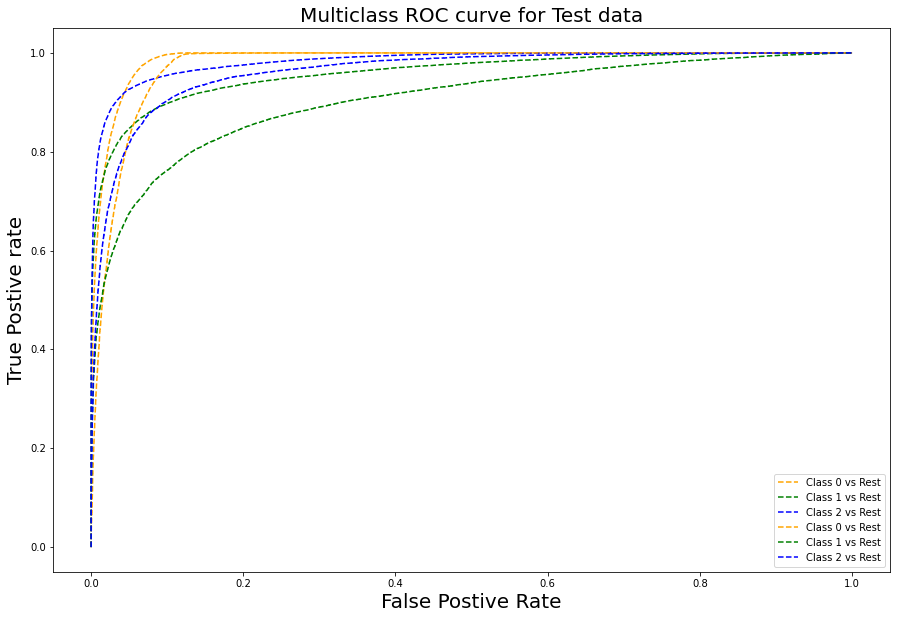

In [ ]:
# predicted classes
y_train_preds = grid.predict(X_train)
y_test_preds = grid.predict(X_test)

# predicted classes
y_train_proba = grid.predict_proba(X_train)
y_test_proba = grid.predict_proba(X_test)

#AUC score for train dataset
auc_roc=roc_auc_score(y_train, y_train_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Train dataset is {}'.format(auc_roc))
print('__'*100)

#AUC score for train dataset
auc_roc=roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Test dataset is {}'.format(auc_roc))
print('__'*100)

#lets get the classification report of Train data
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_log))
print('__'*100)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_log))
print('__'*100)

# Lets plot roc_auc curve for train data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc
 
# Compute ROC curve and ROC area for each class

n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train, y_train_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Train data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 


# Lets plot roc_auc curve for test data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc
 
# Compute ROC curve and ROC area for each class

n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Test data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 


## SVM (Support Vector Machine)

reference link: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/

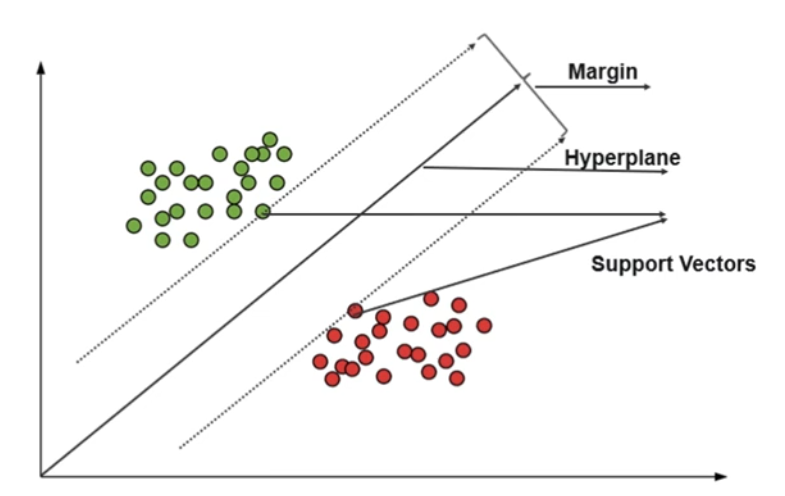

Support vector - the data points/vectors close to the hyper plane are called support vector.
1. if a data point lies outside the the margin then they do not influence the model
2. They are robust against outliers.
3. If support vector are disturbed then the model changes.
4. The D of hyper plane is decided by no. of input variables. if 3 input features then 2d hyper  plane.
5.  Difference between SVM and SVC(Support vector classifier) is the hyper plane, if the hyperplane is linear in nature during classification then it becomes SVC.


Two types of Margin

**Soft Margin** - In real case we cannot classify all things in linear separable way(using straight line).
1. Here margin violation occurs
2. The datapoints can be found on the either side of classification.

**Hard Margin**
Here the classification of points are strict
1. Problem of overfitting
2. Note: In order to find the maximal margin, we need to maximize the margin between the data points and the hyperplane.

**SVM**- here the instead of separating the dataset by using straight line(Linearly) we use curvess(Non linear or polynomial)

**Kernel**- The kernel trick is that the lower dimension data are transformed into higher dimension data and then they are separated

Most famous Non linear Kernels are:
1. Polynomial SVM kernel
2. Gaussian Radial Basis Function (rbf)
3. Sigmoid kernel

**Polynomial SVM kernel**
Pros:
1. Here we can specify the degree of polynomial thus any dataset can be easily taken into higher dimension followed by separation with linear hyperplane without slowing down the model

**rbf kernels (Radial basis kernel)**
Pros:
1. here sigma is the hyperplane and distance between the variables are squared.
2. When sigma =1 then distance between the points are zero, when sigma increases then the distance between the points decreases (<1).

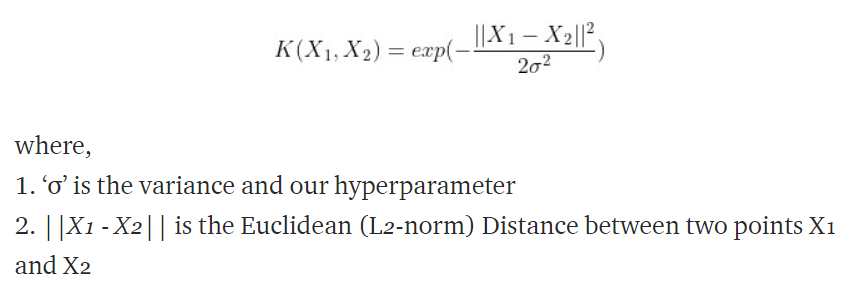

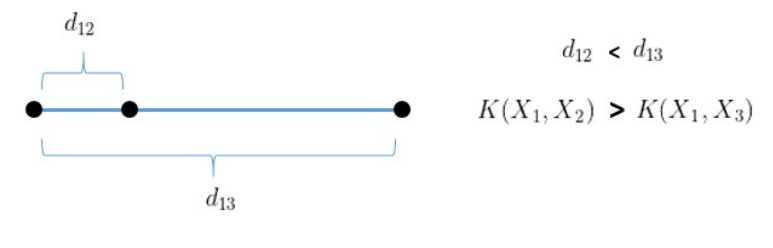

**For sigma =1**

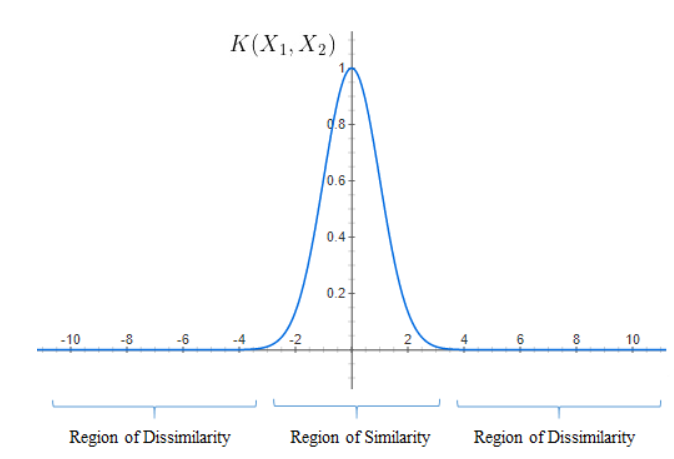

**For sigma = 10**

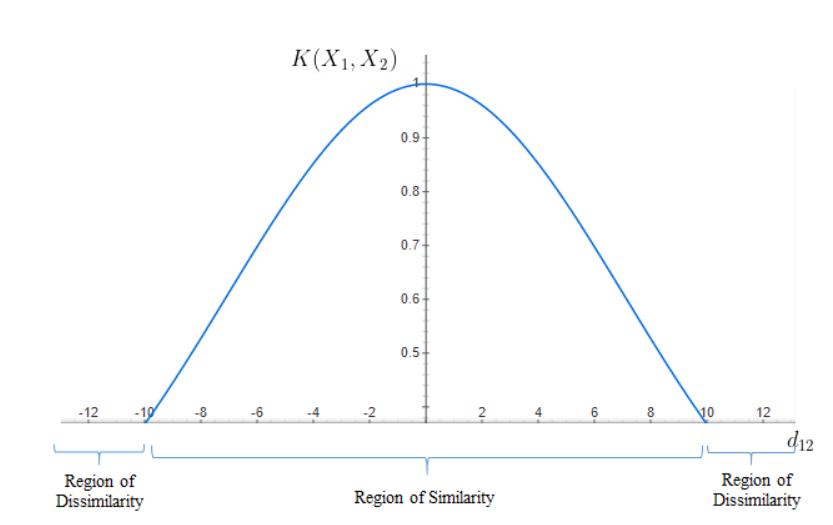

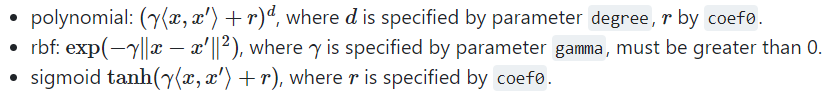

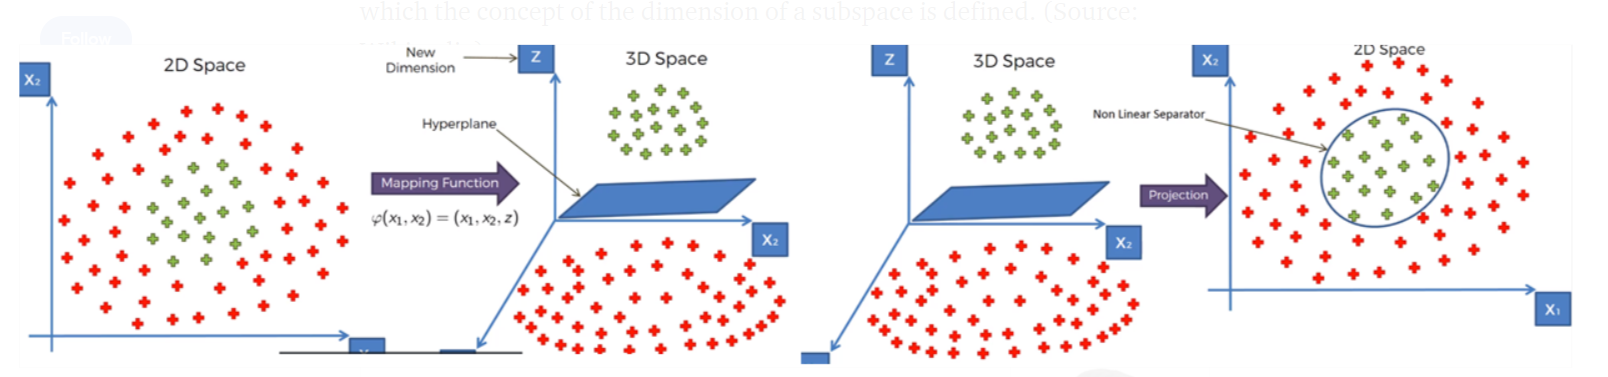

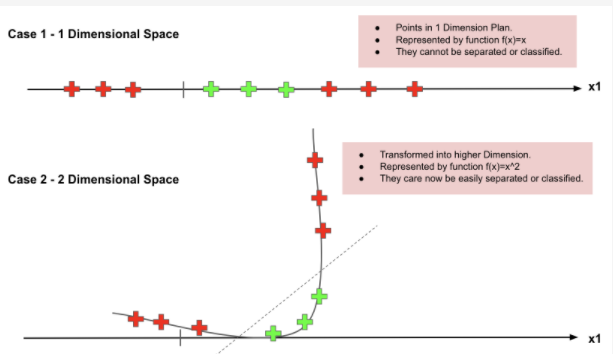

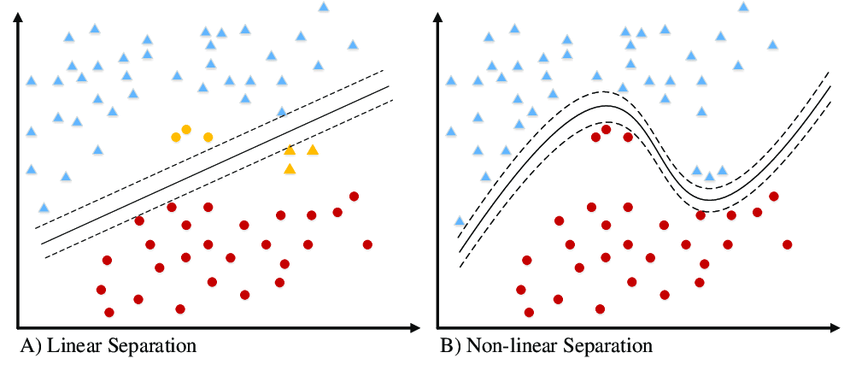

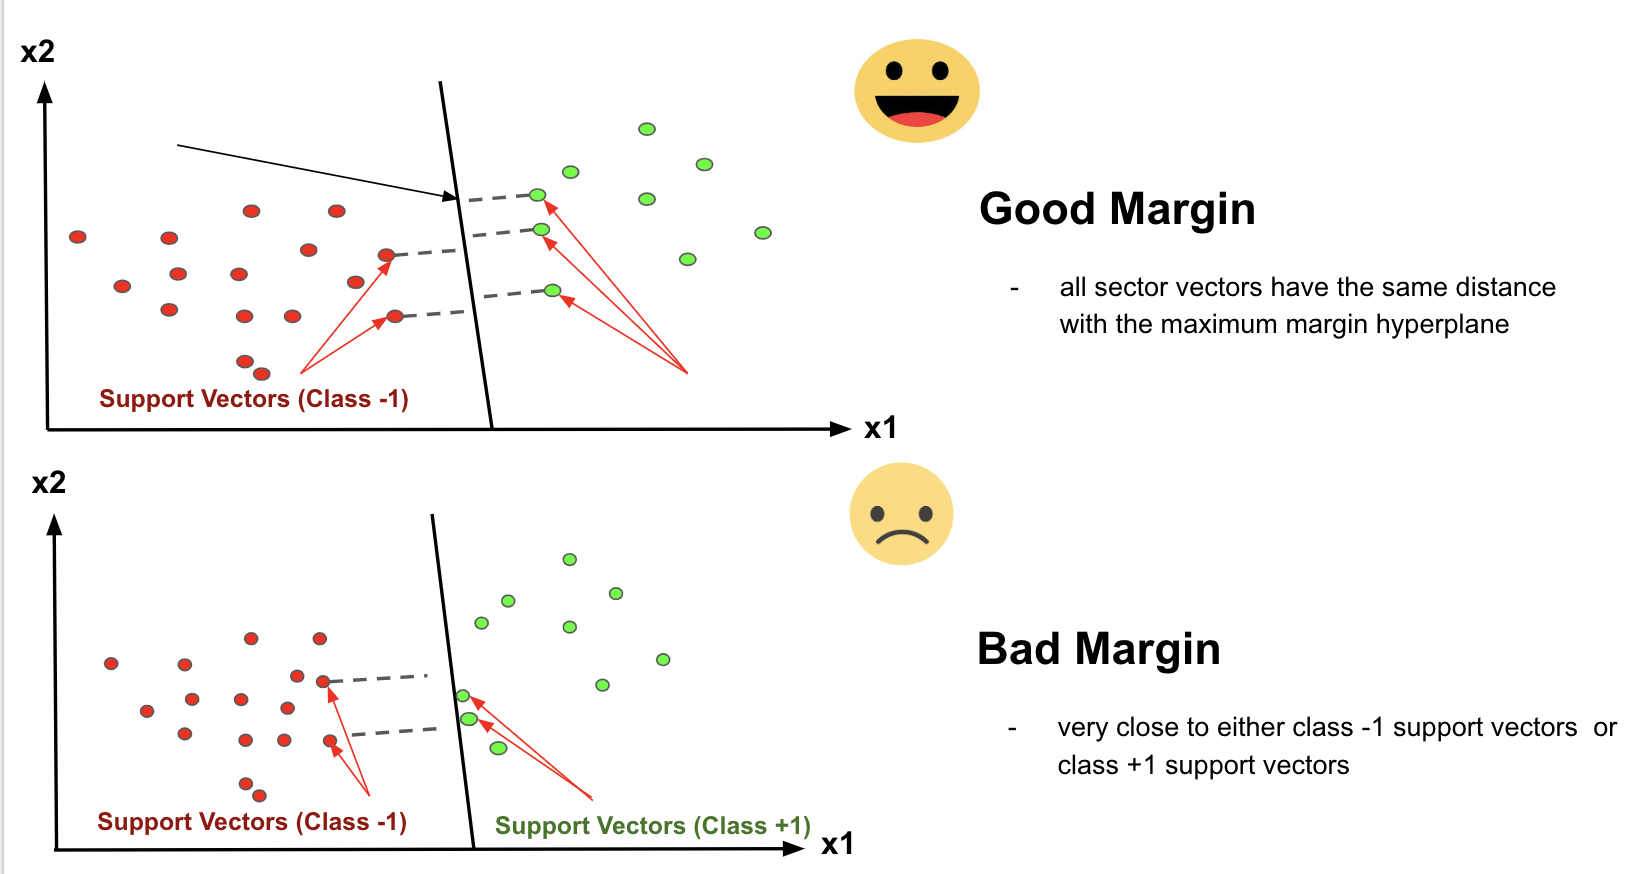

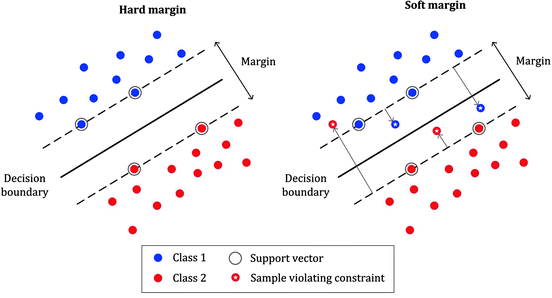

### Hyperparameters
1. Regularization parameter C - for larger C the model take more data points as support vector -so we get higher variance and lower bias - means overfitting , for lower C- model take few data points as support vector - so we get lower variance and higher bias - under fit. 

2. Gamma parameter (Must be greater than 0)- this parameter is used only in RBF kernel. For linear or polynomial kernel does not need gamma. This decides the curvature of the decision boundary. Higher gamma - more curvature, lower gamma - lower curvature.

3. Kernel- linear,rbf,poly,sigmoid

4. Degree- higher degree higher flexibility , highly used in polynomial kernel

5. Random state

### SVM
Advantages:
1. Effective in higher dimensional space
2. Best for unstructured data like images,texts and tree 
3. Use of kernel so easy use under non linear condition
4. It has L2 norm means and small change in dataset does not affect model.

Disadv:
1. Not best for larger dataset
2. Sensitive to outlier if they are large in number
3. Fine tuning every time is complex and takes more time for larger dataset.
4. Since distance based scaling is essential

Application:
1. Handwriting recognition

2. Face Detection

3. Text and hypertext categorization

4. Image Classification

5. Bioinformatics (protein classification and cancer classification)

In [ ]:
np.shape(X)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  68353 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                68353 non-null  float64
 9   Total_Images               68353 non-null  float64
 10  Email_Status               68353 non-null  int64  
 11  Customer_Location_A        68353 non-null  uint8  
 12  Customer_Location_B        68353 non-null  uint8  
 13  Customer_Location_C        68353 non-null  uin

In [ ]:
# train, test split

#importing library
from sklearn.model_selection import train_test_split

X=df[df.columns.drop(['Email_Status','Email_ID'])].values
y=df['Email_Status'].values.reshape(-1,1)

print('The shape of X is {}'.format(X.shape))
print('The shape of y is {}'.format(y.shape))
print('__'*100)
print('__'*100)

# Usage of SMOTE (synthetic minority oversampling technique)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)

print('The shape of X_smote is {}'.format(X_smote.shape))
print('The shape of y_smote is {}'.format(y_smote.shape))
print('__'*100)
print('__'*100)

#Since scaling is important in distance based algorithm lets minmax it..!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_log_reg)
X_scaled = scaler.fit_transform(X_smote)
y_scaled=scaler.fit_transform(y_smote.reshape(-1,1))

#label encoding of y
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_labeled=le.fit_transform(y_scaled)


X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_labeled,train_size=0.6,test_size=0.4,shuffle=True,random_state=42) # as we are going to impute SMOTE in the variable its better to have larger test data set
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

print('__'*100)
print('__'*100)

y_resample=pd.DataFrame(y_smote)
y_resample.value_counts()# now the equal distribution is achieved using the SMOTE method


The shape of X is (68353, 16)
The shape of y is (68353, 1)
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The shape of X_smote is (164823, 16)
The shape of y_smote is (164823,)
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The shape of X_train is (98893, 16)
The shape of X_test is (65930,

2    54941
1    54941
0    54941
dtype: int64

In [ ]:
### starting with linear hyperplane classification
from sklearn.svm import SVC

# storing in variable 
svc=SVC(probability=True)

#Fitting the model to svc
svc.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
#Getting support vector
svc.support_vectors_

array([[0.        , 0.14142136, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.28284271, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.22183241, 1.        , ..., 0.        , 0.77671114,
        0.22328886],
       [0.93322463, 0.03657437, 0.06677537, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.55038238, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# predicted classes
y_train_preds = svc.predict(X_train)
y_test_preds = svc.predict(X_test)

In [ ]:
# predicted classes
y_train_proba = svc.predict_proba(X_train)
y_test_proba = svc.predict_proba(X_test)

### Evaluation of Data set

In [ ]:
auc_roc=roc_auc_score(y_train, y_train_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Train dataset is {}'.format(auc_roc))

The AUC ROC score of Train dataset is 0.8486353369425368


In [ ]:
auc_roc=roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Test dataset is {}'.format(auc_roc))

The AUC ROC score of Test dataset is 0.8457097919639212


In [ ]:
#lets get the classification report of Train data
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_log))

              precision    recall  f1-score   support

           0       0.33      0.39      0.36     33015
           1       0.33      0.18      0.23     33009
           2       0.33      0.44      0.38     32869

    accuracy                           0.33     98893
   macro avg       0.33      0.33      0.32     98893
weighted avg       0.33      0.33      0.32     98893



In [ ]:
#lets get the classification report of Test data
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_log))

              precision    recall  f1-score   support

           0       0.33      0.39      0.36     21926
           1       0.33      0.18      0.23     21932
           2       0.33      0.43      0.38     22072

    accuracy                           0.33     65930
   macro avg       0.33      0.33      0.32     65930
weighted avg       0.33      0.33      0.32     65930



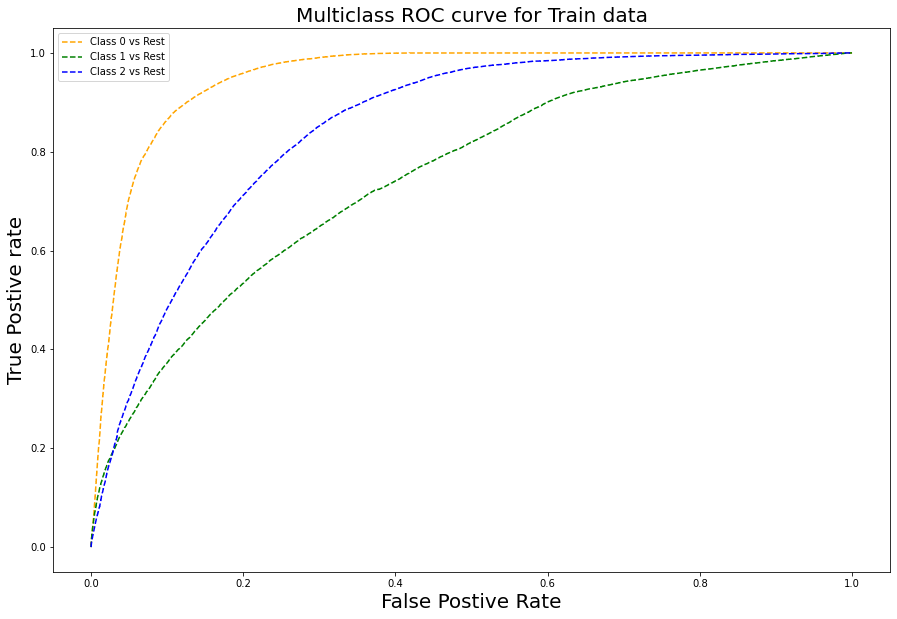

In [ ]:
# Lets plot roc_auc curve for train data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc
 
# Compute ROC curve and ROC area for each class

n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train, y_train_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Train data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

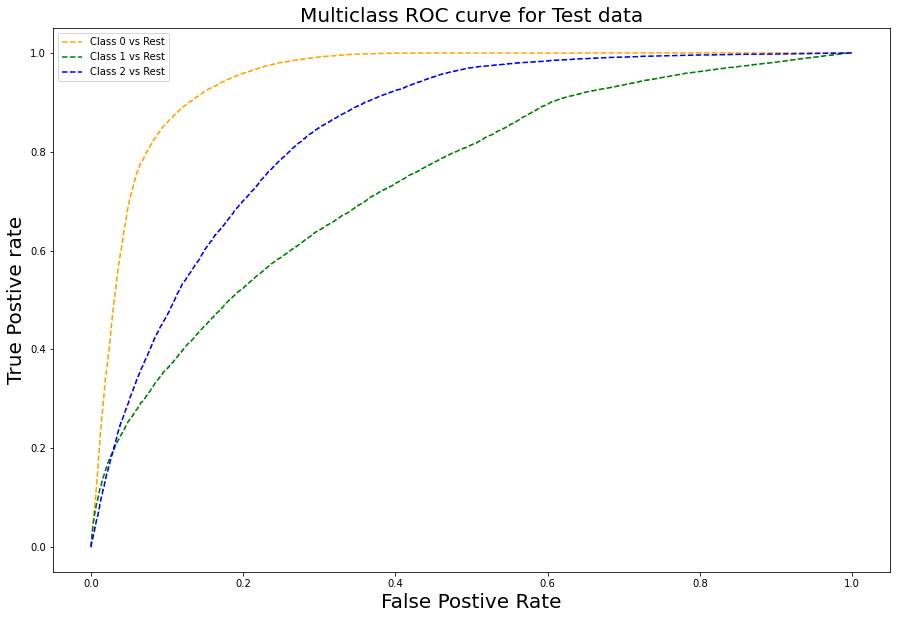

In [ ]:
# Lets plot roc_auc curve for test data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc

# 
# Compute ROC curve and ROC area for each class
y_score=y_test_proba
n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Test data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

Text(0.5, 1.0, 'Confusion Matrix for train data set')

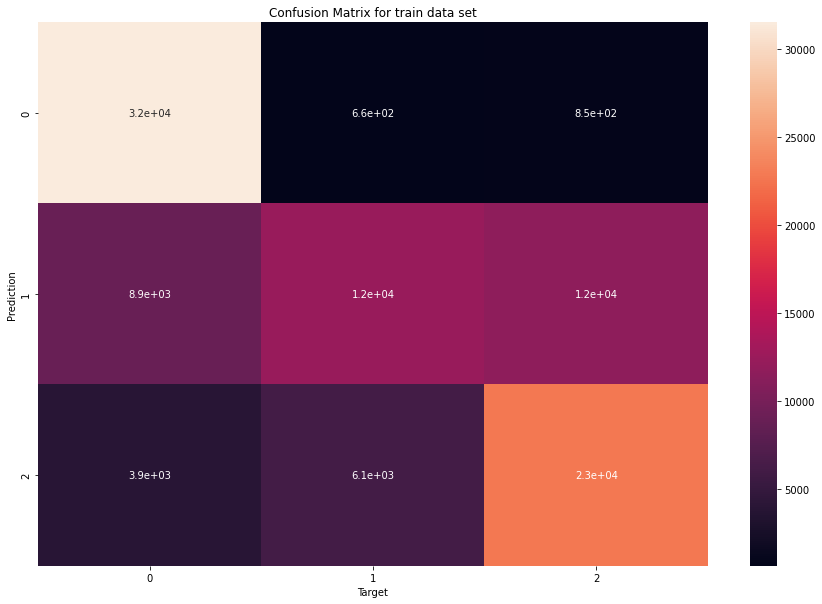

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train, y_train_preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for train data set')

Text(0.5, 1.0, 'Confusion Matrix for Test data set')

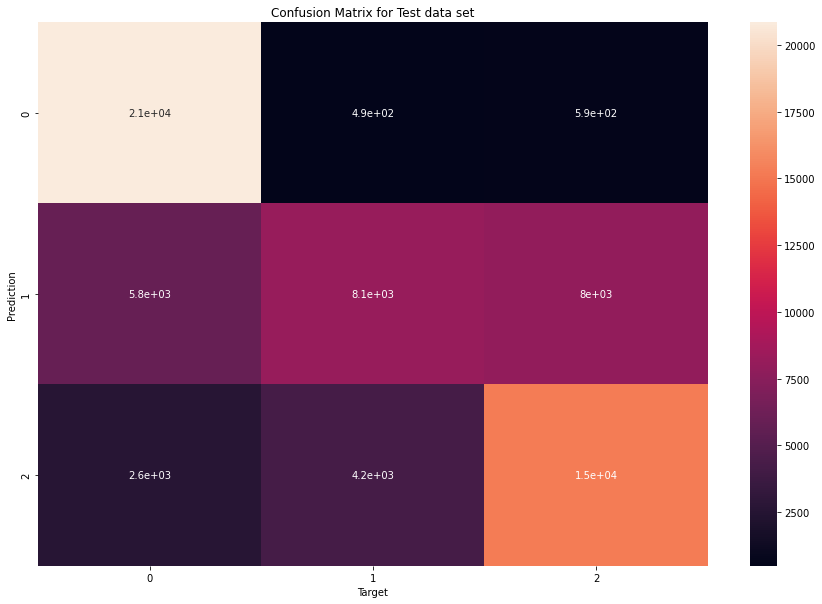

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_test_preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for Test data set')

### Linear Kernel implementation

In [ ]:
# cross validation by parametric combination 1
from sklearn.model_selection import RandomizedSearchCV
svc = SVC(probability=True,C= 0.01,kernel= 'linear')

# Training the model with data
svc.fit(X_train,y_train)

SVC(C=0.01, kernel='linear', probability=True)

In [ ]:
# predicted classes
y_train_preds = svc.predict(X_train)
y_test_preds = svc.predict(X_test)

# predicted classes
y_train_proba = svc.predict_proba(X_train)
y_test_proba = svc.predict_proba(X_test)

#Evaluation of data 

auc_roc=roc_auc_score(y_train, y_train_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Train dataset is {}'.format(auc_roc))
print('__'*100)

auc_roc=roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Test dataset is {}'.format(auc_roc))
print('__'*100)

#lets get the classification report of Train data
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_preds))
print('__'*100)

#lets get the classification report of Test data
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_preds))
print('__'*100)


The AUC ROC score of Train dataset is 0.6800447379380019
__*100
The AUC ROC score of Test dataset is 0.680802613436217
__*100
              precision    recall  f1-score   support

           0       0.55      0.63      0.59     33015
           1       0.44      0.20      0.27     33009
           2       0.48      0.67      0.56     32869

    accuracy                           0.50     98893
   macro avg       0.49      0.50      0.47     98893
weighted avg       0.49      0.50      0.47     98893

__*100
              precision    recall  f1-score   support

           0       0.54      0.64      0.59     21926
           1       0.44      0.20      0.27     21932
           2       0.48      0.67      0.56     22072

    accuracy                           0.50     65930
   macro avg       0.49      0.50      0.47     65930
weighted avg       0.49      0.50      0.47     65930

__*100


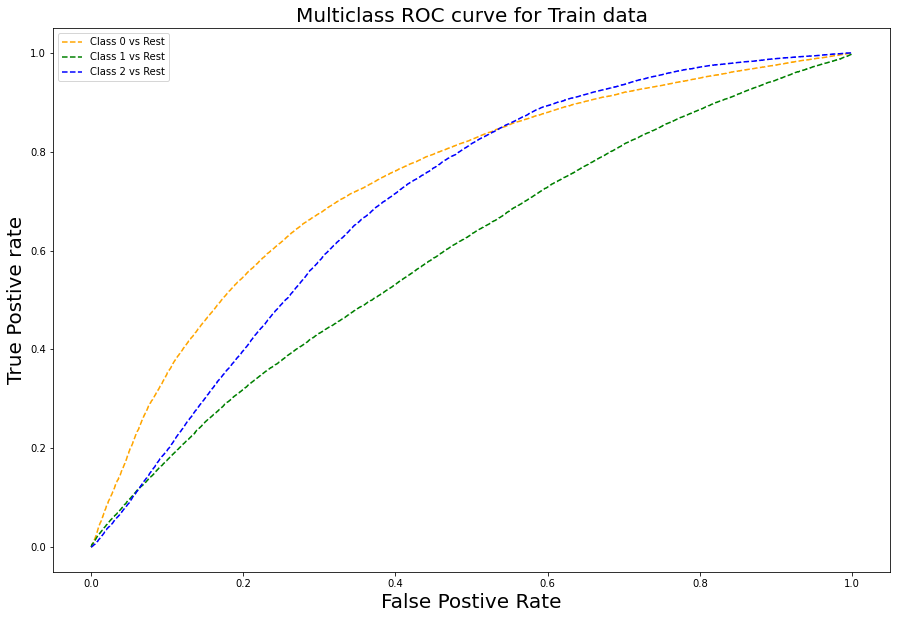

In [ ]:
# Lets plot roc_auc curve for train data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc
 
# Compute ROC curve and ROC area for each class

n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train, y_train_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Train data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

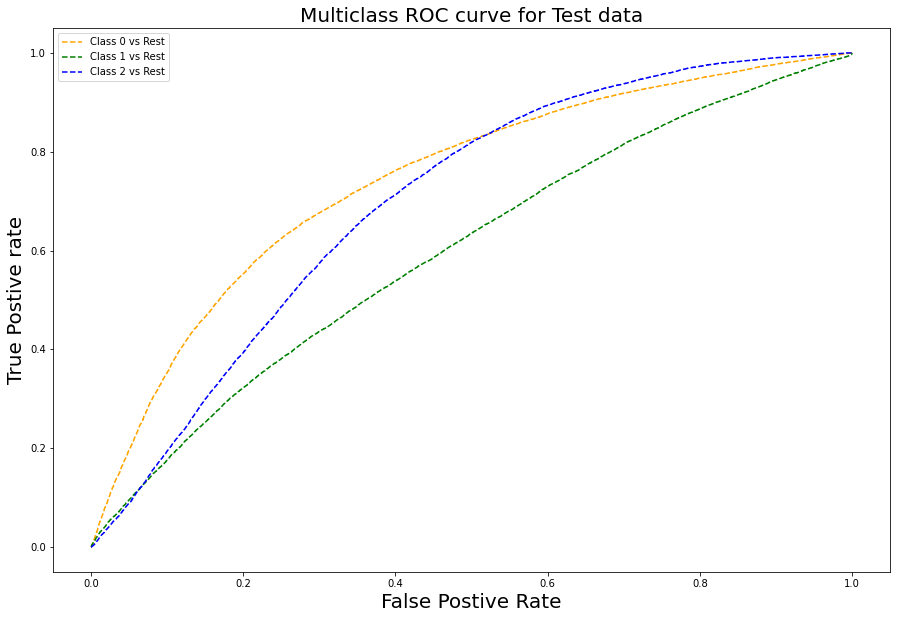

In [ ]:
# Lets plot roc_auc curve for test data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc

# 
# Compute ROC curve and ROC area for each class
y_score=y_test_proba
n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Test data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

Text(0.5, 1.0, 'Confusion Matrix for train data set')

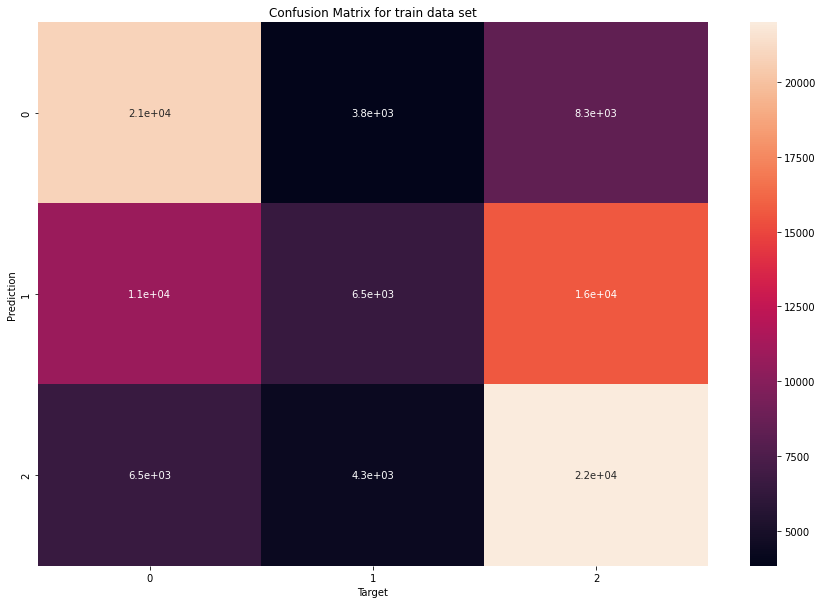

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train, y_train_preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for train data set')

Text(0.5, 1.0, 'Confusion Matrix for Test data set')

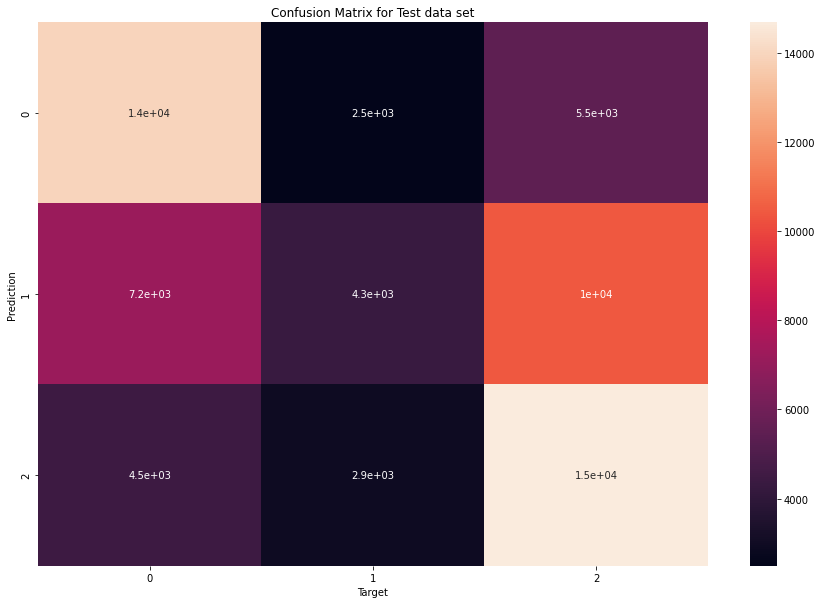

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_test_preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for Test data set')

### Polynomial kernel implementation

In [ ]:
# cross validation by parametric combination 2
from sklearn.svm import SVC
svc = SVC(C= 0.01,degree=3,kernel='poly',probability=True)

# Training the model with data
svc.fit(X_train,y_train)

SVC(C=0.01, kernel='poly', probability=True)

In [ ]:
# predicted classes
y_train_preds = svc.predict(X_train)
y_test_preds = svc.predict(X_test)


In [ ]:

# predicted classes
y_train_proba = svc.predict_proba(X_train)
y_test_proba = svc.predict_proba(X_test)

#Evaluation of data 

auc_roc=roc_auc_score(y_train, y_train_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Train dataset is {}'.format(auc_roc))
print('__*100')

auc_roc=roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Test dataset is {}'.format(auc_roc))
print('__*100')

#lets get the classification report of Train data
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_preds))
print('__*100')

#lets get the classification report of Test data
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_preds))
print('__*100')

The AUC ROC score of Train dataset is 0.8088590506311218
__*100
The AUC ROC score of Test dataset is 0.8088428493969133
__*100
              precision    recall  f1-score   support

           0       0.68      0.88      0.77     33015
           1       0.57      0.32      0.41     33009
           2       0.59      0.68      0.63     32869

    accuracy                           0.63     98893
   macro avg       0.61      0.63      0.60     98893
weighted avg       0.61      0.63      0.60     98893

__*100
              precision    recall  f1-score   support

           0       0.68      0.88      0.77     21926
           1       0.56      0.31      0.40     21932
           2       0.59      0.68      0.63     22072

    accuracy                           0.63     65930
   macro avg       0.61      0.62      0.60     65930
weighted avg       0.61      0.63      0.60     65930

__*100


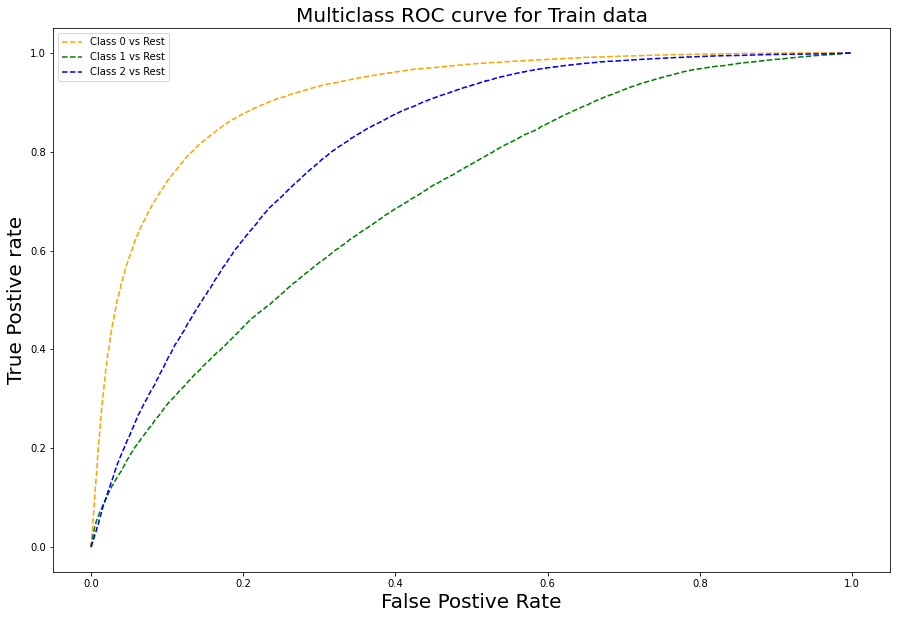

In [ ]:
# Lets plot roc_auc curve for train data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc
 
# Compute ROC curve and ROC area for each class

n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train, y_train_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Train data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

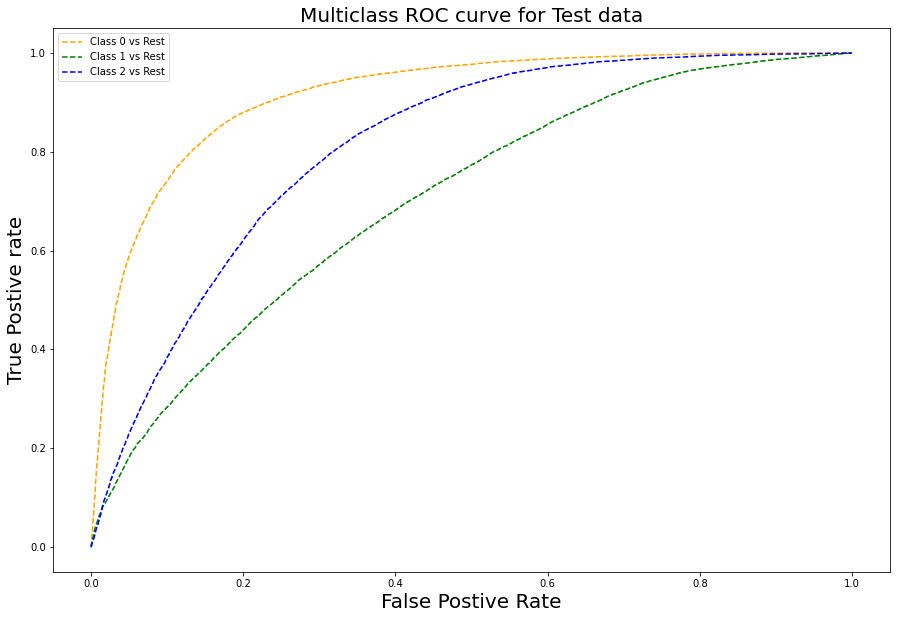

In [ ]:
# Lets plot roc_auc curve for test data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc

# 
# Compute ROC curve and ROC area for each class
y_score=y_test_proba
n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Test data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

Text(0.5, 1.0, 'Confusion Matrix for train data set')

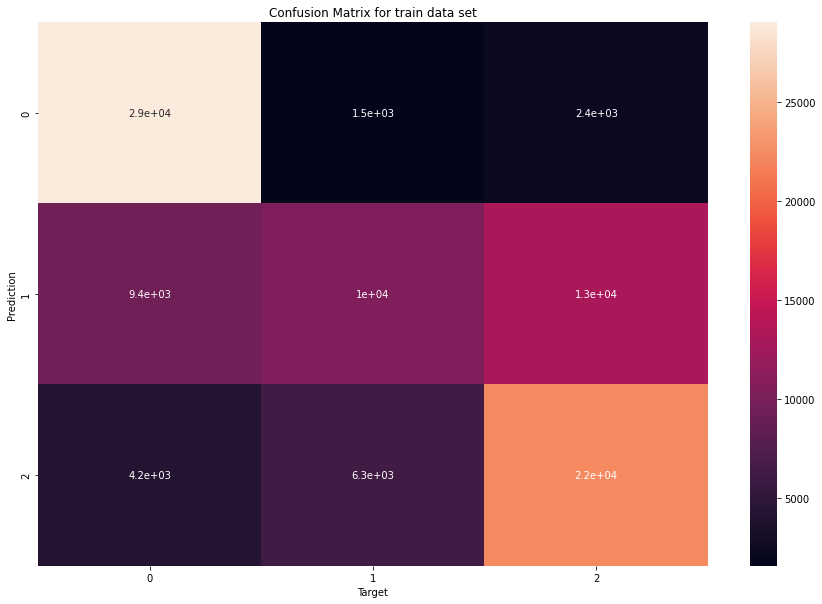

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train, y_train_preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for train data set')

Text(0.5, 1.0, 'Confusion Matrix for Test data set')

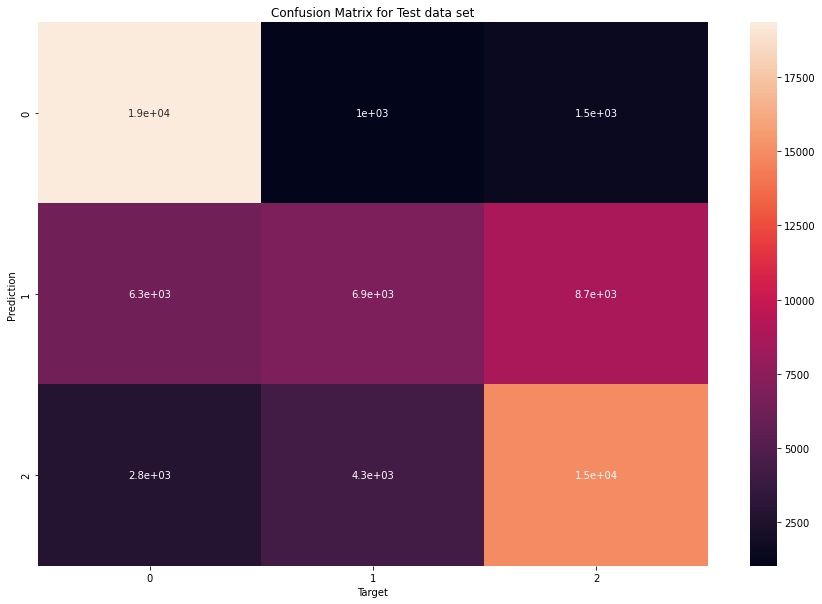

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_test_preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for Test data set')

### Gaussian rbf Kernel implementation

In [ ]:
grid =SVC(probability=True,C= 0.01,kernel='rbf')

# Training the model with data
grid.fit(X_train,y_train)

SVC(C=0.01, probability=True)

In [ ]:
# predicted classes
y_train_preds = grid.predict(X_train)
y_test_preds = grid.predict(X_test)

# predicted classes
y_train_proba = grid.predict_proba(X_train)
y_test_proba = grid.predict_proba(X_test)

#Evaluation of data 

auc_roc=roc_auc_score(y_train, y_train_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Train dataset is {}'.format(auc_roc))
print('__*100')

auc_roc=roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Test dataset is {}'.format(auc_roc))
print('__*100')

#lets get the classification report of Train data
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_preds))
print('__*100')

#lets get the classification report of Test data
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_preds))
print('__*100')


The AUC ROC score of Train dataset is 0.796353564427557
__*100
The AUC ROC score of Test dataset is 0.796421093348228
__*100
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     33015
           1       0.57      0.24      0.34     33009
           2       0.57      0.69      0.62     32869

    accuracy                           0.61     98893
   macro avg       0.60      0.61      0.57     98893
weighted avg       0.60      0.61      0.57     98893

__*100
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     21926
           1       0.57      0.25      0.34     21932
           2       0.57      0.69      0.63     22072

    accuracy                           0.61     65930
   macro avg       0.60      0.61      0.57     65930
weighted avg       0.60      0.61      0.57     65930

__*100


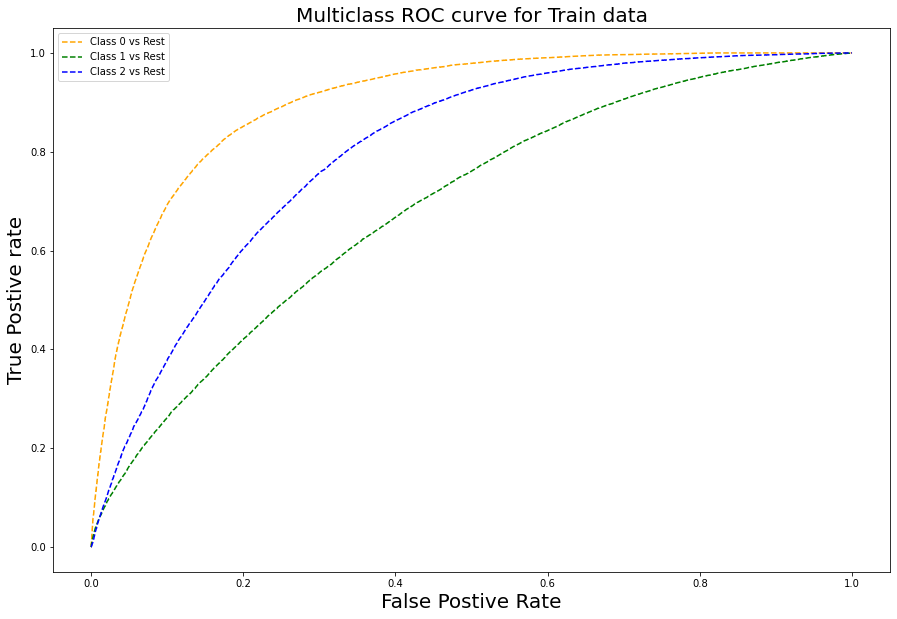

In [ ]:
# Lets plot roc_auc curve for train data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc
 
# Compute ROC curve and ROC area for each class

n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train, y_train_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Train data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

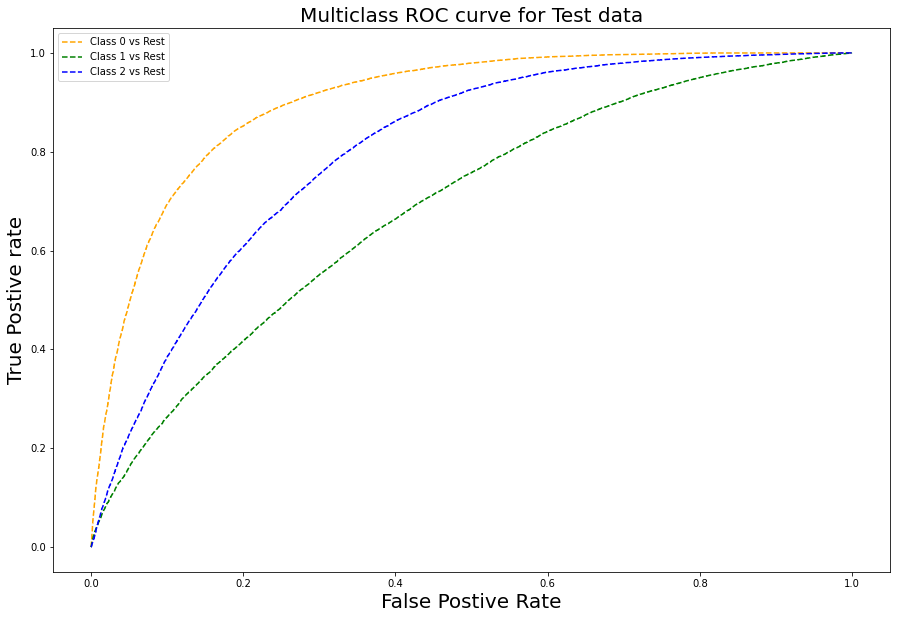

In [ ]:
# Lets plot roc_auc curve for test data set

#importing libraries
from sklearn.metrics import plot_roc_curve, auc

# 
# Compute ROC curve and ROC area for each class
y_score=y_test_proba
n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Test data',fontsize=20)
plt.xlabel('False Postive Rate',fontsize=20)
plt.ylabel('True Postive rate',fontsize=20)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

Text(0.5, 1.0, 'Confusion Matrix for train data set')

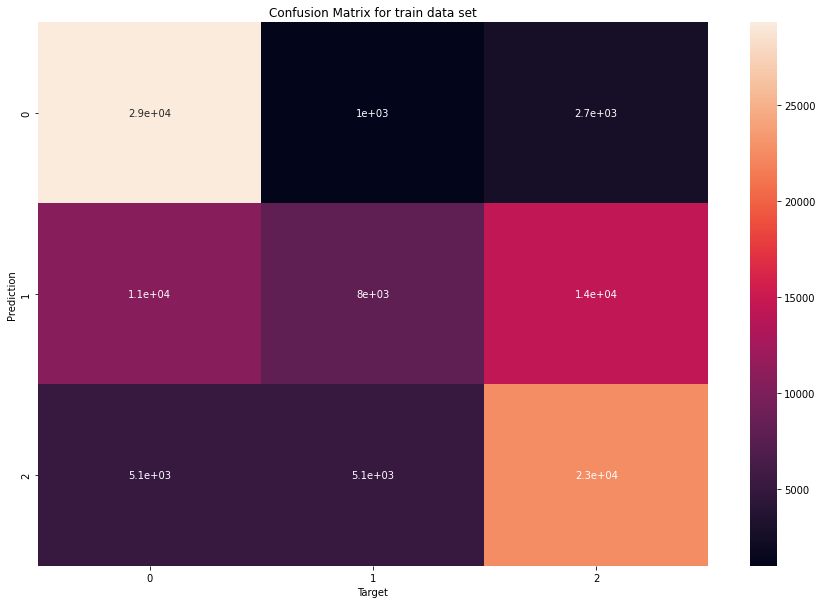

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train, y_train_preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for train data set')

Text(0.5, 1.0, 'Confusion Matrix for Test data set')

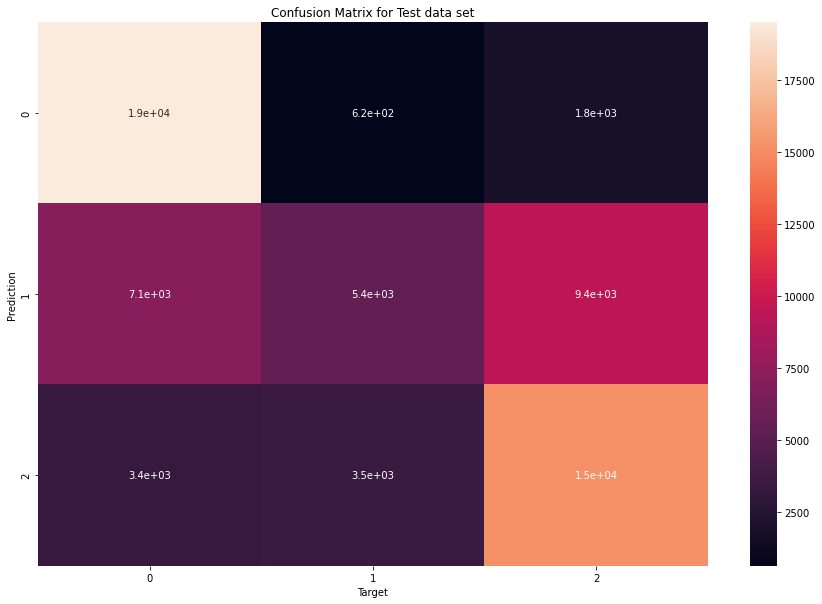

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_test_preds)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for Test data set')

## Final imputation with best model

In [ ]:
xgb=XGBClassifier(objective='multi:softmax', num_classes=3,booster= 'gbtree',
 eta= 0.1,
 gamma= 0,
 max_depth= 9,
 n_estimators= 150)

In [ ]:
# train, test split

#importing library
from sklearn.model_selection import train_test_split

X=df[df.columns.drop(['Email_Status','Email_ID'])].values
y=df['Email_Status'].values

print('The shape of X is {}'.format(X.shape))
print('The shape of y is {}'.format(y.shape))
print('__'*100)
print('__'*100)

# Usage of SMOTE (synthetic minority oversampling technique)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)
print('The shape of X_smote is {}'.format(X_smote.shape))
print('The shape of y_smote is {}'.format(y_smote.shape))
print('__'*100)
print('__'*100)



X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,train_size=0.6,test_size=0.4,shuffle=True,random_state=42) # as we are going to impute SMOTE in the variable its better to have larger test data set
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

print('__'*100)
print('__'*100)

y_resample=pd.DataFrame(y_smote)
y_resample.value_counts()# now the equal distribution is achieved using the SMOTE method


In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(eta=0.1, max_depth=9, n_estimators=150, num_classes=3,
              objective='multi:softprob')

In [ ]:
# predicted classes
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

# predicted classes
y_train_proba = xgb.predict_proba(X_train)
y_test_proba = xgb.predict_proba(X_test)

#Evaluation of data 

auc_roc=roc_auc_score(y_train, y_train_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Train dataset is {}'.format(auc_roc))
print('__'*100)

auc_roc=roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')
print('The AUC ROC score of Test dataset is {}'.format(auc_roc))
print('__'*100)

#lets get the classification report of Train data
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_preds))
print('__'*100)

#lets get the classification report of Test data
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_preds))
print('__'*100)

The AUC ROC score of Train dataset is 0.9767707085482056
________________________________________________________________________________________________________________________________________________________________________________________________________
The AUC ROC score of Test dataset is 0.9457852278006591
________________________________________________________________________________________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     33015
           1       0.95      0.76      0.84     33009
           2       0.89      0.94      0.91     32869

    accuracy                           0.89     98893
   macro avg       0.90      0.89      0.89     98893
weighted avg       0.90      0.89      0.89     98893

________________________________________________________________________________________________________

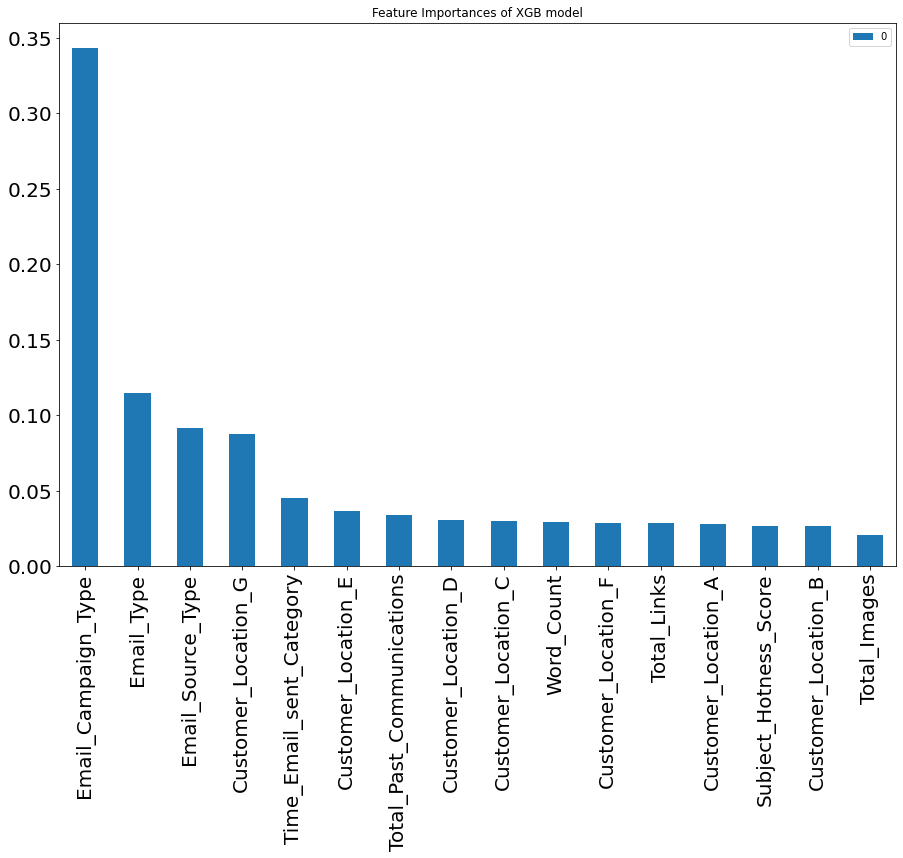

In [ ]:
pd.DataFrame(xgb.feature_importances_,index=(df.columns.drop(['Email_ID','Email_Status']))).sort_values(0,ascending=False).plot(kind='bar',title='Feature Importances of XGB model',fontsize=20)

## Summary:
1. We did manipulate the data by imputing missing variable 
2. We have perfomed univariate Analysis, Bi variate analysis.
3. We imputed Logistic regression as base model and performed hyperparameter tuning for better results.
4. We then used XGBoost classifier for performing classification.
5. We imputed the different types of SVM(Support vector machine)
6. Finally imputed best model for our data.

## Conclusion

1. We can observe the conversion rate is dependent on the Email_campaign_type and email_type signifiantly. From univariate analysis we could conclude that campaign type 3 and email type 2 could have huge impact on conversion

2. On this data set we observed imbalance so we used smote technique to overcome the situation.

3. During the execution of this project the XGB model was far faster than the SVM. It is our mistake to use the SVM for huge Datasize. However an intresting outcome has been observed that the difference between train and test auc_roc was almost 0 which is remarkable about the technique.

4. Email source type too has an impact over the conversion rate of mail.

So, based on this weightage i guess we could categories the mail before sending. This weightage of features could be an filter before sending a mail to the consumer for higher conversion rate.

Thank you for reading this for ......!!!!

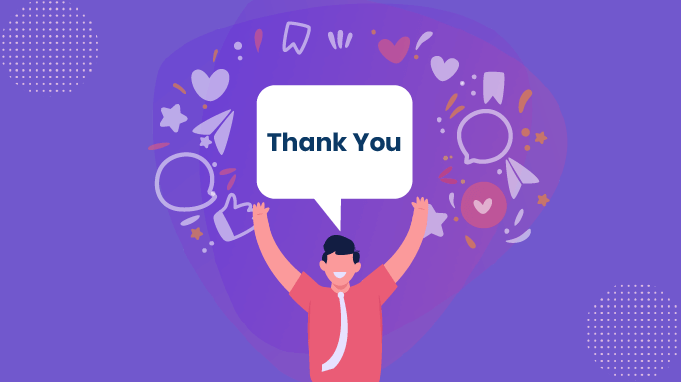